Jacob Rowan

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import requests
import seaborn as sns
import re
import statsmodels.formula.api as smf
import statsmodels.api as sm
import itertools

from bs4 import BeautifulSoup
from pylab import rcParams
from scipy.stats import chi2_contingency
from statsmodels.sandbox.regression.predstd import wls_prediction_std

rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

%matplotlib inline

## Task one
**a** Static Data:ImportTable 2.1 ofthe World Happiness Reportdata

In [3]:
#Puts the data from the given excel sheet into a dataframe

happyDat = pd.read_excel("WHRData2020.xls", sheet_name='Table2.1',  encoding='latin1')

happyExplain = pd.read_excel("WHRData2020.xls", sheet_name='Figure2.4',  encoding='latin1')

#Here I am taking just the Lifeladder values as this is the variable that is being used
#The 'Positive affect' may have also been an interesting variable to investigate, but as there will be a number 
#of indicator variables used also I thought it would be excessive for my purposes
happyLad = happyDat.iloc[:,0:3]

#Converts the variable into an int rather than a string
happyLad['year'] = happyLad['year'].astype(int)

## Task one
**b** Dynamic data

In [4]:
url =  "http://api.worldbank.org/v2/indicator?page=20"
response = requests.get(url)
indicatorResult = response.content
APIscraping = BeautifulSoup(indicatorResult, "lxml")
APIscrapingName = APIscraping.find_all('wb:name')
APIscrapingSource = APIscraping.find_all('wb:sourcenote')


run = True
indx=1
check = 0
while(run):
    try:  
        url =  "http://api.worldbank.org/v2/indicator?per_page=5000&page=" + str(indx)
        response = requests.get(url)
        print(response)
        indicatorResult = response.content
        APIscraping[indx-1] = BeautifulSoup(indicatorResult, "lxml")
        APIscrapingName[indx-1] = APIscraping[indx-1].find_all('wb:name')
        APIscrapingSource[indx-1] = APIscraping[indx-1].find_all('wb:sourcenote')
        
        indx+=1
        check=0
        print(indx)
        if(indx>5):
            break
    except:
        print("Line number ", indx, " did not load")
        indx+=1
        check+=1
        if(check>3):
            run=False

<Response [200]>
2
<Response [200]>
3
<Response [200]>
4
<Response [200]>
5
<Response [200]>
6


In [5]:
for z in range(0,5):
    for x, y in zip(APIscrapingName[z], APIscrapingSource[z]):
        print(x)
        print(y)

<wb:name>Poverty Headcount ($1.90 a day)</wb:name>
<wb:sourcenote>The poverty headcount index measures the proportion of the population with daily per capita income (in 2011 PPP) below the poverty line.</wb:sourcenote>
<wb:name>Poverty Headcount ($2.50 a day)</wb:name>
<wb:sourcenote>The poverty headcount index measures the proportion of the population with daily per capita income (in 2005 PPP) below the poverty line.</wb:sourcenote>
<wb:name>Middle Class ($10-50 a day) Headcount</wb:name>
<wb:sourcenote>The poverty headcount index measures the proportion of the population with daily per capita income (in 2005 PPP) below the poverty line.</wb:sourcenote>
<wb:name>Official Moderate Poverty Rate-National</wb:name>
<wb:sourcenote>The poverty headcount index measures the proportion of the population with daily per capita income below the official poverty line developed by each country.</wb:sourcenote>
<wb:name>Poverty Headcount ($4 a day)</wb:name>
<wb:sourcenote>The poverty headcount inde

<wb:name>National assessment for learning outcomes in Niger, CP, French (mean score)</wb:name>
<wb:sourcenote>Mean scores calculated for the results of the national assessment carried out in the specific grade and subject, as reported by the Local Education Group (LEG). Country-specific definition and method are determined by the country.</wb:sourcenote>
<wb:name>National assessment for learning outcomes (SNERS) in Senegal, CE2, Mathematics, minimal competency (%)</wb:name>
<wb:sourcenote>Minimal competency calculated for the results of the national assessment carried out in the specific subject and grade, as reported by the Local Education Group (LEG). Country-specific definition and method are determined by the country. </wb:sourcenote>
<wb:name>National assessment for learning outcomes in Vietnam, grade 5, Mathematics - Level 1, scores in indicated level (%)</wb:name>
<wb:sourcenote>Students in respective level in the results of the national assessment carried out in the specific gr

<wb:name>Barro-Lee: Percentage of population age 15+ with primary schooling. Completed Primary</wb:name>
<wb:sourcenote>Percentage of population age 15+ with primary schooling. Completed Primary</wb:sourcenote>
<wb:name>Barro-Lee: Percentage of female population age 20-24 with primary schooling. Completed Primary</wb:name>
<wb:sourcenote>Percentage of female population age 20-24 with primary schooling. Completed Primary</wb:sourcenote>
<wb:name>Barro-Lee: Percentage of population age 20-24 with primary schooling. Completed Primary</wb:name>
<wb:sourcenote>Percentage of population age 20-24 with primary schooling. Completed Primary</wb:sourcenote>
<wb:name>Barro-Lee: Percentage of female population age 25-29 with primary schooling. Completed Primary</wb:name>
<wb:sourcenote>Percentage of female population age 25-29 with primary schooling. Completed Primary</wb:sourcenote>
<wb:name>Barro-Lee: Percentage of population age 25-29 with primary schooling. Completed Primary</wb:name>
<wb:sourc

<wb:sourcenote>Grants are defined as legally binding commitments that obligate a specific value of funds available for disbursement for which there is no repayment requirement. Data are in current U.S. dollars.</wb:sourcenote>
<wb:name>Grants, excluding technical cooperation (BoP, current US$)</wb:name>
<wb:sourcenote>Grants are defined as legally binding commitments that obligate a specific value of funds available for disbursement for which there is no repayment requirement. Data are in current U.S. dollars.</wb:sourcenote>
<wb:name>Technical cooperation grants (current US$)</wb:name>
<wb:sourcenote>Technical cooperation grants include free-standing technical cooperation grants, which are intended to finance the transfer of technical and managerial skills or of technology for the purpose of building up general national capacity without reference to any specific investment projects; and investment-related technical cooperation grants, which are provided to strengthen the capacity to e

<wb:sourcenote>Local currency units (LCU) per U.S. dollar, with values prior to the currency's introduction presented in the new currency's terms</wb:sourcenote>
<wb:name>Exchange rate, old LCU per USD extended forward, period average</wb:name>
<wb:sourcenote>Local currency units (LCU) per U.S. dollar, with values after a new currency's introduction presented in the old currency's terms</wb:sourcenote>
<wb:name>Rest of General Government External Debt (US$)</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Short-Term Debt</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Identified Short-Term Debt (US$, end of year)</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Stock Markets, US$</wb:name>
<wb:sourcenote>Local equity market index valued in US$ terms</wb:sourcenote>
<wb:name>Stock Markets, LCU</wb:name>
<wb:sourcenote>Local equity market index valued in local currency unit (LCU) terms</wb:sourcenote>
<wb:name>LT Principal due per balance of payments account (BoP, current US$)</wb

<wb:name>Gross Ext. Debt Pos., All Sectors, All maturities, All instruments, end of period, USD</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Gross Ext. Debt Pos., All Sectors, All maturities, All instruments,  Exchange rate chg, USD</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Gross Ext. Debt Pos., All Sectors, All maturities, All instruments, Beginning pos., USD</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Net Ext. Debt Position, All Sectors, All maturities, All instruments, USD</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Gross Ext. Debt Pos., All Sectors, All maturities, All instruments, Other chg in vol., USD</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Gross Ext. Debt Pos., All Sectors, All maturities, All instruments, Other price chg, USD</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Gross Ext. Debt Pos., All Sectors, All maturities, Arrears, USD</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Gross Ext. Debt Pos., All Sectors, All maturities

<wb:name>Gross Ext. Debt Pos., Deposit-Taking Corp., exc. CB, Short-term, Debt securities, USD</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Gross Ext. Debt Pos., General Government, Short-term, Debt securities, Beginning of period, USD</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Ext. Assets in Debt Instruments, General Government, Short-term, Debt securities, USD</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Gross Ext. Debt Pos., General Government, Short-term, Debt securities, end of period, USD</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Gross Ext. Debt Pos., General Government, Short-term, Debt securities, Exchange rate chg, USD</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Gross Ext. Debt Pos., General Government, Short-term, Debt securities, Beginning pos., USD</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Net Ext. Debt Position, General Government, Short-term, Debt securities, USD</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Gross Ext. Deb

<wb:sourcenote></wb:sourcenote>
<wb:name>Ext. Debt Service Pmt, Public Sector Ext. Debt, 3 to 6 mo., All instruments, Interest, USD</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Ext. Debt Service Pmt, Public Sector Ext. Debt, 4yrs, All instruments, Interest, USD</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Ext. Debt Service Pmt, Public Sector Ext. Debt, 5 to 10 yrs, All instruments, Interest, USD</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Ext. Debt Service Pmt, Public Sector Ext. Debt, 5yrs, All instruments, Interest, USD</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Ext. Debt Service Pmt, Public Sector Ext. Debt, 6 to 9 mo., All instruments, Interest, USD</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Ext. Debt Service Pmt, Public Sector Ext. Debt, 9 to 12 mo., All instruments, Interest, USD</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Ext. Debt Service Pmt, Public Sector Ext. Debt, 10 to 15 yrs, All instruments, Interest, USD</wb:name>
<wb:sourcenote

<wb:sourcenote>Agriculture value added per worker is a measure of agricultural productivity. Value added in agriculture measures the output of the agricultural sector (ISIC divisions 1-5) less the value of intermediate inputs. Agriculture comprises value added from forestry, hunting, and fishing as well as cultivation of crops and livestock production. Data are in constant 2010 U.S. dollars.</wb:sourcenote>
<wb:name>Agriculture value added per hectare of agricultural land (constant 1995 US$)</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Capital expenditure (in IDR)</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Goods and services expenditure (in IDR)</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Others expenditure (in IDR)</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Personnel expenditure (in IDR)</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Total Expenditure (in IDR)</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>Water pollution, clay and glass industry (

<wb:name>212_For non-bank e-money issuers (NBEIs), is authorization of new or modified financial products always explicitly required?</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>214_For non-bank e-money issuers (NBEIs), is authorization of new or modified financial products never explicitly required?</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>213_For non-bank e-money issuers (NBEIs), is authorization of new or modified financial products only in some cases explicitly required?</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>215_For non-bank e-money issuers (NBEIs), is authorization of new or modified financial products explicitly required?_#VGJA_05</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>167_Are non-bank e-money issuers (NBEIs) required to check/report to credit bureau for some/all loans?_#VGHA_05</wb:name>
<wb:sourcenote></wb:sourcenote>
<wb:name>143_Are non-bank e-money issuers (NBEIs) liable for any actions or omissions of their agents?_#VGFF_00</wb:name

<wb:name>Main source of emergency funds: family or friends (% able to raise funds, age 15+)</wb:name>
<wb:sourcenote>Among respondents reporting that in case of an emergency it is possible for them to come up with 1/20 of gross national income (GNI) per capita in local currency, the percentage who cite family, relatives, or friends as their main source of this money</wb:sourcenote>
<wb:name>Main source of emergency funds: family or friends, male  (% able to raise funds, age 15+)</wb:name>
<wb:sourcenote>Among respondents reporting that in case of an emergency it is possible for them to come up with 1/20 of gross national income (GNI) per capita in local currency, the percentage who cite family, relatives, or friends as their main source of this money, male (% age 15+).</wb:sourcenote>
<wb:name>Main source of emergency funds: family or friends, in labor force (% able to raise funds, age 15+)</wb:name>
<wb:sourcenote>Among respondents reporting that in case of an emergency it is possible

<wb:sourcenote>Interest payments include interest payments on government debt--including long-term bonds, long-term loans, and other debt instruments--to domestic and foreign residents.</wb:sourcenote>
<wb:name>Other expense (current LCU)</wb:name>
<wb:sourcenote>Other expense is spending on dividends, rent, and other miscellaneous expenses, including provision for consumption of fixed capital.</wb:sourcenote>
<wb:name>Other expense (% of expense)</wb:name>
<wb:sourcenote>Other expense is spending on dividends, rent, and other miscellaneous expenses, including provision for consumption of fixed capital.</wb:sourcenote>
<wb:name>Expense (current US$)</wb:name>
<wb:sourcenote>Expense is cash payments for operating activities of the government in providing goods and services. It includes compensation of employees (such as wages and salaries), interest and subsidies, grants, social benefits, and other expenses such as rent and dividends. Data are in current U.S. dollars.</wb:sourcenote>
<w

<wb:sourcenote>Typology of out-of-school children. Primary. Never in school. Female is the percentage of female out-of-school primary-school-age children who have never attended school and are not likely to enter school in the future. Since no survey can say definitively that a school-age person will never attend school, this is a probabilistic indicator. The indicator is based on UNESCO’s methodology, which estimates the proportion of children who will never attend school as the proportion of out of school for the age group with the lowest proportion of out-of-school children. This methodology assumes no dropout before the age at which enrolment rates peak, and no late entry after the age with peak enrolment.</wb:sourcenote>
<wb:name>MICS: Typology of out-of-school children. Primary. Never in school. Male</wb:name>
<wb:sourcenote>Typology of out-of-school children. Primary. Never in school. Male is the percentage of male out-of-school primary-school-age children who have never attende

<wb:name>Mobile cellular postpaid connection charge (current US$)</wb:name>
<wb:sourcenote>Please cite the International Telecommunication Union for third-party use of these data.  The initial, one-time charge for a new postpaid subscription. Refundable deposits should not be counted. Although some operators waive the connection charge, this does not include the cost of the Subscriber Identity Module (SIM) card. The price of the SIM card should be included in the connection charge. It should also be noted if free minutes or free SMS are included in the connection charge. Taxes should be included. If not included, it should be specified in a note including the tax rate applicable. This indicator is expressed in local currency.  </wb:sourcenote>
<wb:name>Mobile cellular postpaid connection charge (current LCU)</wb:name>
<wb:sourcenote>Please cite the International Telecommunication Union for third-party use of these data.  The initial, one-time charge for a new postpaid subscription. Ref

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<wb:sourcenote>Percentage of benefits going to the richestquintile  relative to the total benefits going to the population</wb:sourcenote>
<wb:name>Benefits incidence in 5th quintile (richest) (%) - All Labor Market</wb:name>
<wb:sourcenote>Percentage of benefits going to the richestquintile  relative to the total benefits going to the population</wb:sourcenote>
<wb:name>Benefits incidence in 5th quintile (richest) (%) - All Labor Market -urban</wb:name>
<wb:sourcenote>Percentage of benefits going to the richestquintile  relative to the total benefits going to the population</wb:sourcenote>
<wb:name>Beneficiary incidence in extreme poor (&lt;$1.90 PPP a day) (%) - All Labor Market  (preT)</wb:name>
<wb:sourcenote>Percentage of program beneficiaries in a quintile relative to the total number of beneficiaries in the population</wb:sourcenote>
<wb:name>Beneficiary incidence in extreme poor (&lt;$1.90 PPP a day) (%) - All Labor Market</wb:name>
<wb:sourcenote>Percentage of program benefici

<wb:name>Beneficiary incidence in 1st quintile (poorest) (%) - Domestic Private Transfers -urban</wb:name>
<wb:sourcenote>Percentage of program beneficiaries in a quintile relative to the total number of beneficiaries in the population</wb:sourcenote>
<wb:name>Beneficiary incidence in 2nd quintile (%) - Domestic Private Transfers (preT)</wb:name>
<wb:sourcenote>Percentage of program beneficiaries in a quintile relative to the total number of beneficiaries in the population</wb:sourcenote>
<wb:name>Beneficiary incidence in 2nd quintile (%) - Domestic Private Transfers -rural</wb:name>
<wb:sourcenote>Percentage of program beneficiaries in a quintile relative to the total number of beneficiaries in the population</wb:sourcenote>
<wb:name>Beneficiary incidence in 2nd quintile (%) - Domestic Private Transfers</wb:name>
<wb:sourcenote>Percentage of program beneficiaries in a quintile relative to the total number of beneficiaries in the population</wb:sourcenote>
<wb:name>Beneficiary incidenc

<wb:name>Adequacy of benefits (%) - Cash Transfer -rural</wb:name>
<wb:sourcenote>Total transfer amount received by all beneficiaries in a population group as a share of the total welfare of beneficiaries in that group</wb:sourcenote>
<wb:name>Adequacy of benefits (%) - Cash Transfer </wb:name>
<wb:sourcenote>Total transfer amount received by all beneficiaries in a population group as a share of the total welfare of beneficiaries in that group</wb:sourcenote>
<wb:name>Adequacy of benefits (%) - Cash Transfer -urban</wb:name>
<wb:sourcenote>Total transfer amount received by all beneficiaries in a population group as a share of the total welfare of beneficiaries in that group</wb:sourcenote>
<wb:name>Adequacy of benefits in 1st quintile (poorest) (%) - Cash Transfer (preT)</wb:name>
<wb:sourcenote>Total transfer amount received by all beneficiaries in a population group as a share of the total welfare of beneficiaries in that group</wb:sourcenote>
<wb:name>Adequacy of benefits in 1st qui

<wb:sourcenote>Percentage of benefits going to the richestquintile  relative to the total benefits going to the population</wb:sourcenote>
<wb:name>Benefits incidence in 5th quintile (richest) (%) - Other Social Assistance -rural</wb:name>
<wb:sourcenote>Percentage of benefits going to the richestquintile  relative to the total benefits going to the population</wb:sourcenote>
<wb:name>Benefits incidence in 5th quintile (richest) (%) - Other Social Assistance</wb:name>
<wb:sourcenote>Percentage of benefits going to the richestquintile  relative to the total benefits going to the population</wb:sourcenote>
<wb:name>Benefits incidence in 5th quintile (richest) (%) - Other Social Assistance -urban</wb:name>
<wb:sourcenote>Percentage of benefits going to the richestquintile  relative to the total benefits going to the population</wb:sourcenote>
<wb:name>Beneficiary incidence in extreme poor (&lt;$1.90 PPP a day) (%) - Other Social Assistance (preT)</wb:name>
<wb:sourcenote>Percentage of pro

<wb:sourcenote>Poverty gap reduction due to SPL programs as % of pre-transfer poverty gap</wb:sourcenote>
<wb:name>Poverty Gap reduction (%) -  Social Pension -extreme poor (&lt;$1.90 PPP a day)</wb:name>
<wb:sourcenote>Poverty gap reduction due to SPL programs as % of pre-transfer poverty gap</wb:sourcenote>
<wb:name>Poverty Gap reduction (%) -  Social Pension -1st quintile (poorest) (preT)</wb:name>
<wb:sourcenote>Poverty gap reduction due to SPL programs as % of pre-transfer poverty gap</wb:sourcenote>
<wb:name>Poverty Gap reduction (%) -  Social Pension -1st quintile (poorest) -rural</wb:name>
<wb:sourcenote>Poverty gap reduction due to SPL programs as % of pre-transfer poverty gap</wb:sourcenote>
<wb:name>Poverty Gap reduction (%) -  Social Pension -1st quintile (poorest)</wb:name>
<wb:sourcenote>Poverty gap reduction due to SPL programs as % of pre-transfer poverty gap</wb:sourcenote>
<wb:name>Poverty Gap reduction (%) -  Social Pension - 1st quintile (poorest) -urban</wb:name>
<

<wb:name>Wittgenstein Projection: Percentage of the population age 80+ by highest level of educational attainment. Post Secondary. Total</wb:name>
<wb:sourcenote>Share of the population of the stated age group that has completed post-secondary or tertiary education as the highest level of educational attainment. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/</wb:sourcenote>
<wb:name>Wittgenstein Projection: Percentage of the population age 80+ by highest level of educational attainment. No Education. Female</wb:name>
<wb:sourcenote>Share

<wb:name>School enrollment, tertiary, male (% gross)</wb:name>
<wb:sourcenote>Gross enrollment ratio is the ratio of total enrollment, regardless of age, to the population of the age group that officially corresponds to the level of education shown. Tertiary education, whether or not to an advanced research qualification, normally requires, as a minimum condition of admission, the successful completion of education at the secondary level.</wb:sourcenote>
<wb:name>Graduates from tertiary education, both sexes (number)</wb:name>
<wb:sourcenote>Total number of students successfully completing tertiary education programmes (ISCED 5 to 8) in public and private tertiary education institutions during the reference academic year.</wb:sourcenote>
<wb:name>Percentage of female graduates from tertiary education graduating from Agriculture, Forestry, Fisheries and Veterinary programmes, female (%)</wb:name>
<wb:sourcenote>Share of all female tertiary graduates who completed Agriculture, Forestry, 

<wb:sourcenote>Prevalence of acute respiratory infection (ARI): Percentage of children under age five years who were ill with a cough accompanied with rapid breathing in the two weeks preceding the survey.</wb:sourcenote>
<wb:name>Prevalence of acute respiratory infection (ARI) (% of children under 5): Q4</wb:name>
<wb:sourcenote>Prevalence of acute respiratory infection (ARI): Percentage of children under age five years who were ill with a cough accompanied with rapid breathing in the two weeks preceding the survey.</wb:sourcenote>
<wb:name>Prevalence of acute respiratory infection (ARI) (% of children under 5): Q5 (highest)</wb:name>
<wb:sourcenote>Prevalence of acute respiratory infection (ARI): Percentage of children under age five years who were ill with a cough accompanied with rapid breathing in the two weeks preceding the survey.</wb:sourcenote>
<wb:name>ARI prevalence (% of children under 5)</wb:name>
<wb:sourcenote>Children with acute respiratory infection (ARI) refers to the

<wb:sourcenote>Population, ages 11-16, female is the total number of females age 11-16.</wb:sourcenote>
<wb:name>Population, ages 11-16, male</wb:name>
<wb:sourcenote>Population, ages 11-16, male is the total number of males age 11-16.</wb:sourcenote>
<wb:name>Population, ages 11-16, total</wb:name>
<wb:sourcenote>Population, ages 11-16, total is the total population age 11-16.</wb:sourcenote>
<wb:name>Population, ages 11-17, female</wb:name>
<wb:sourcenote>Population, ages 11-17, female is the total number of females age 11-17.</wb:sourcenote>
<wb:name>Population, ages 11-17, male</wb:name>
<wb:sourcenote>Population, ages 11-17, male is the total number of males age 11-17.</wb:sourcenote>
<wb:name>Population, ages 11-17, total</wb:name>
<wb:sourcenote>Population, ages 11-17, total is the total population age 11-17.</wb:sourcenote>
<wb:name>Population, ages 11-18, female</wb:name>
<wb:sourcenote>Population, ages 11-18, female is the total number of females age 11-18.</wb:sourcenote>
<w

<wb:name>Trading across borders: Time to export (days) (DB06-15 methodology) - Score</wb:name>
<wb:sourcenote>The score for the time to export benchmarks economies with respect to the regulatory best practice on the indicator. The score ranges from 0 to 100, where 0 represents the worst regulatory performance and 100 the best regulatory performance, and is computed based on the methodology in the DB06-15 studies.</wb:sourcenote>
<wb:name>Time to import: Border compliance (hours) (DB16-20 methodology)</wb:name>
<wb:sourcenote>The time for border compliance to import records the time associated with compliance with the economy’s customs regulations and with regulations relating to other inspections that are mandatory in order for the import shipment to cross the economy’s border, as well as the time and cost for handling that takes place at its port or border. It is calculate in hours. The time for this segment includes time for customs clearance and inspection procedures conducted by ot

<wb:name>Percentage of male teachers in lower secondary education who are newly recruited, male (%)</wb:name>
<wb:sourcenote>Number of newly recruited male teachers in public lower secondary education expressed as a percentage of male teachers in service in public lower secondary education. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/</wb:sourcenote>
<wb:name>Percentage of teachers in lower secondary education who are newly recruited, both sexes (%)</wb:name>
<wb:sourcenote>Number of newly recruited teachers in public lower secondary education expressed as a percentage of teachers in service in public lower secondary education. For more information, consult the UNESCO Institute of Statistics website: http://www.uis.unesco.org/Education/</wb:sourcenote>
<wb:name>Percentage of female teachers in upper secondary education who are newly recruited, female (%)</wb:name>
<wb:sourcenote>Number of newly recruited female teachers 

<wb:sourcenote></wb:sourcenote>
<wb:name>Voice and Accountability: Estimate</wb:name>
<wb:sourcenote>Voice and Accountability captures perceptions of the extent to which a country's citizens are able to participate in selecting their government, as well as freedom of expression, freedom of association, and a free media. Estimate gives the country's score on the aggregate indicator, in units of a standard normal distribution, i.e. ranging from approximately -2.5 to 2.5.</wb:sourcenote>
<wb:name>Voice and Accountability: Number of Sources</wb:name>
<wb:sourcenote>Voice and Accountability captures perceptions of the extent to which a country's citizens are able to participate in selecting their government, as well as freedom of expression, freedom of association, and a free media.  Number of sources indicates the number of underlying data sources on which the aggregate estimate is based.</wb:sourcenote>
<wb:name>Voice and Accountability: Percentile Rank</wb:name>
<wb:sourcenote>Voice and 

In [6]:
#I had a function like this in an earlier draft 
#For some reason I deleted it and couldn't remember how I had written it
#This was how I located variables I intended to use though

#Search = The keyword you wish to search for. The current function only works if an identical string is specified, which is not a huge amount of help.

def searchInd(search):
    scrapList = []
    for x in range(0, 4):
        if APIscraping.findAll(text = re.compile(search))!= None:
            scrapList.append(APIscraping.findAll(text = re.compile(search)))
    return scrapList

mySearch = searchInd('^Poverty$')
mySearch

[[], [], [], []]

In [7]:
#Initial wrangling function that displays the number of null pointers in the set
#Also gives the user the choice to drop na values with boolean

#indicator = The specific indicator that you wish to recieve data about. Must be a string, also include formating specifiers (i.e date)
#dropNa = A boolean value, if True drops any row that has null values

def indWrangle(indicator, dropNa):
    url = "http://api.worldbank.org/v2/countries/all/indicators/%s&format=json&per_page=6000" % indicator
    print(url)
    response = requests.get(url)
    print(response)
    result = response.content
    result = json.loads(result)
    df = pd.DataFrame.from_dict(result[1])
    nanCount = df.isna().sum()
    print(nanCount)
    if(dropNa):
        df.dropna(axis = 0, how = 'any', inplace = True)
    return df
testFrame = indWrangle("SP.URB.TOTL?date=2000:2018", False)
testFrame.head(5)

http://api.worldbank.org/v2/countries/all/indicators/SP.URB.TOTL?date=2000:2018&format=json&per_page=6000
<Response [200]>
country             0
countryiso3code     0
date                0
decimal             0
indicator           0
obs_status          0
unit                0
value              64
dtype: int64


country countryiso3code  date  decimal  \
0  {'id': '1A', 'value': 'Arab World'}             ARB  2018        0   
1  {'id': '1A', 'value': 'Arab World'}             ARB  2017        0   
2  {'id': '1A', 'value': 'Arab World'}             ARB  2016        0   
3  {'id': '1A', 'value': 'Arab World'}             ARB  2015        0   
4  {'id': '1A', 'value': 'Arab World'}             ARB  2014        0   

                                           indicator obs_status unit  \
0  {'id': 'SP.URB.TOTL', 'value': 'Urban populati...                   
1  {'id': 'SP.URB.TOTL', 'value': 'Urban populati...                   
2  {'id': 'SP.URB.TOTL', 'value': 'Urban populati...                   
3  {'id': 'SP.URB.TOTL', 'value': 'Urban populati...                   
4  {'id': 'SP.URB.TOTL', 'value': 'Urban populati...                   

         value  
0  247363364.0  
1  241543664.0  
2  235729168.0  
3  229821020.0  
4  223793602.0

I used the indWrangle function above to test the indicators listed below to test for the amount of NAN/NULL values and gave them a ranking <br>

The factors I chose to investiage further are:
- How much of an impact the environment has on an individuals (countries) happiness
- How much of an impact sustainable living has on happiness

BEST - 0-500 NAN <br>
GOOD - 500-1500 NAN VALUES<br>
LMTD - 2000-3000 NAN<br>
WEAK - 3000+ NAN<br>
NULL - SET RESULTS IN ERROR<br>

Indicators to explore
EG.CFT.ACCS.ZS     -GOOD-  Access to clean fuels and technologies for cooking  (% of population) GOOD <br>
AG.LND.FRST.ZS     -GOOD-  Forest area (% of land area) GOOD <br>
AG.LND.FRST.K2     -GOOD-  Forest area (sq. km) GOOD <br>
AG.LND.TOTL.K2     -BEST-  Land area (sq. km) GOOD <br>
AG.LND.TOTL.RU.K2  -WEAK-  Rural land area (sq. km) ONLY SEEMS TO HAVE 2000/2010 <br>
AG.LND.TOTL.UR.K2  -WEAK-  Urban land area (sq. km) ONLY SEEMS TO HAVE 2000/2010 <br>
EN.POP.DNST        -BEST-  Population density (people per sq. km of land area) GOOD <br>
EN.POP.SLUM.UR.ZS  -WEAK-  Population living in slums (% of urban population) MULTIPLE MISSING POINTS OF DATA ONLY HAS 2000,2005,2007,2009,2014<br>
AG.LND.CROP.ZS     -GOOD-  Permanent cropland (% of land area)<br>
EG.ELC.HYRO.ZS     -GOOD-  Electricity production from hydroelectric sources (% of total)<br>
EG.ELC.FOSL.ZS     -GOOD-  Electricity production from oil, gas and coal sources (% of total)<br>
EG.ELC.NUCL.ZS     -LMTD-  Electricity production from nuclear sources (% of total)<br>
EG.ELC.RNEW.ZS     -GOOD-  Renewable electricity output (% of total electricity output)<br>
SH.H2O.SAFE.RU.ZS  -NULL-  Improved water source, rural (% of rural population with access)<br>
SH.H2O.SAFE.UR.ZS  -NULL-  Improved water source, urban (% of urban population with access)<br>
SH.H2O.SAFE.ZS     -NULL-  Improved water source (% of population with access)<br>
SP.RUR.TOTL        -BEST-  Rural population<br>
SP.RUR.TOTL.ZS     -BEST-  Rural population (% of total population)<br>
SP.URB.TOTL        -BEST-  Urban population<br>
SP.URB.TOTL.IN.ZS  -BEST-  Urban population (% of total)<br>
EN.ATM.PM25.MC.M3  -    -  PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)<br>
ER.PTD.TOTL.ZS     -    -  Terrestrial and marine protected areas (% of total territorial area) <br>

FACTORS TO CONSIDER
- Outliers on a set (values that are signficantly different to expected)
- Multitudes of null values
- How perception of what is being asked may differ from country to country (what defines a slum in NZ vs a slum in India)
- Significant gaps in time between data (As with Rural land area (sq. km)






In [8]:
#I Considered making adding a 'country' variable also, that would have allowed you to enter a list of countries and would exclude all others, but this seemed excessive
#I also considered turning the indicator variable into a list of strings instead of having to enter each indicator individually, but again thought that was superfluous 
#I change the 'date' and 'country' column names to suit the WHR dataframe. This makes the coming merge significantly easier
#I also drop a selection of the columns that are not beneficial to what this report aims to achieve
#The jargon characters that would have bee imported to the frame are also dropped, leaving clean country, column and year values/names

#Indicator = The specific indicator that you wish to recieve data about. Must be a string, also include formating specifiers (i.e date)
#dropNa = A boolean value, if True drops any row that has null values
#dropExtra = A boolean value, if True drops columns that would become duplicates

def indClean(indicator, dropNa, dropExtra):
    url = "http://api.worldbank.org/v2/countries/all/indicators/%s&format=json&per_page=6000" % indicator
    response = requests.get(url)
    result = response.content
    result = json.loads(result)
    print(indicator)
    df = pd.DataFrame.from_dict(result[1])
    if(dropNa):
        df.dropna(axis = 0, how = 'any', inplace = True)
    if(not dropExtra):
        df['country'] = df[['country']].applymap(lambda x : x['value'])
    df['indicator'] = df[['indicator']].applymap(lambda x : x['value'])
    df['value'] = df['value'].astype(float)
    df.rename(columns = {'value' : df.iloc[0,4], 'date' : 'year', 'country' : 'Country name'}, inplace = True)
    df.drop(columns = ['obs_status','unit','indicator','decimal','countryiso3code'], inplace = True)
    df['year'] = df['year'].astype(int)
    if(dropExtra):
        df.drop(columns = ['Country name','year'], inplace = True)
    return df
testFrame = indClean("SP.URB.TOTL?date=2000:2018", False, False)
testFrame.head(10)

SP.URB.TOTL?date=2000:2018


Country name  year  Urban population
0   Arab World  2018       247363364.0
1   Arab World  2017       241543664.0
2   Arab World  2016       235729168.0
3   Arab World  2015       229821020.0
4   Arab World  2014       223793602.0
5   Arab World  2013       217954644.0
6   Arab World  2012       212088831.0
7   Arab World  2011       206244906.0
8   Arab World  2010       200303061.0
9   Arab World  2009       194146230.0

In [9]:
# Here I developed my idea of having a list of strings as an argument,
#This function takes a list of indicators and returns a reformatted cleaned dataframe (still with null values)
#indList = A list of indicators (as strings) including the dates that are being investigated

indList = ["SP.RUR.TOTL?date=2000:2019", "SP.RUR.TOTL.ZS?date=2000:2019", "SP.URB.TOTL?date=2000:2019"]
def popDF(indList):
    first = True
    dfList = []
    for x in indList:
        if(first):
            base = indClean(x, False, False)
            first=False
        else:
            dfList.append(indClean(x, False, True))
    for y in dfList:
        base = pd.concat([base, y], axis=1, sort=False)
    return base

testDf = popDF(indList)
testDf.head(10)

SP.RUR.TOTL?date=2000:2019
SP.RUR.TOTL.ZS?date=2000:2019
SP.URB.TOTL?date=2000:2019


Country name  year  Rural population  \
0   Arab World  2019       174564024.0   
1   Arab World  2018       172427227.0   
2   Arab World  2017       170355303.0   
3   Arab World  2016       168295267.0   
4   Arab World  2015       166207258.0   
5   Arab World  2014       164114145.0   
6   Arab World  2013       161751073.0   
7   Arab World  2012       159354716.0   
8   Arab World  2011       156913797.0   
9   Arab World  2010       154586981.0   

   Rural population (% of total population)  Urban population  
0                                 40.798353       253306246.0  
1                                 41.074581       247363364.0  
2                                 41.358516       241543664.0  
3                                 41.654725       235729168.0  
4                                 41.968533       229821020.0  
5                                 42.307520       223793602.0  
6                                 42.599062       217954644.0  
7                                 42.901463       212088831.0  
8                                 43.208052       206244906.0  
9                                 43.559121       200303061.0

In [10]:
testDf

Country name  year  Rural population  \
0                 Arab World  2019       174564024.0   
1                 Arab World  2018       172427227.0   
2                 Arab World  2017       170355303.0   
3                 Arab World  2016       168295267.0   
4                 Arab World  2015       166207258.0   
5                 Arab World  2014       164114145.0   
6                 Arab World  2013       161751073.0   
7                 Arab World  2012       159354716.0   
8                 Arab World  2011       156913797.0   
9                 Arab World  2010       154586981.0   
10                Arab World  2009       152482990.0   
11                Arab World  2008       150318613.0   
12                Arab World  2007       148138437.0   
13                Arab World  2006       145536670.0   
14                Arab World  2005       143402949.0   
15                Arab World  2004       141291864.0   
16                Arab World  2003       139111085.0   
17                Arab World  2002       136973271.0   
18                Arab World  2001       134837870.0   
19                Arab World  2000       132731957.0   
20    Caribbean small states  2019         3599290.0   
21    Caribbean small states  2018         3591223.0   
22    Caribbean small states  2017         3581082.0   
23    Caribbean small states  2016         3568805.0   
24    Caribbean small states  2015         3554435.0   
25    Caribbean small states  2014         3537928.0   
26    Caribbean small states  2013         3519546.0   
27    Caribbean small states  2012         3499695.0   
28    Caribbean small states  2011         3479153.0   
29    Caribbean small states  2010         3456334.0   
...                      ...   ...               ...   
5250                  Zambia  2009         8079604.0   
5251                  Zambia  2008         7918421.0   
5252                  Zambia  2007         7766712.0   
5253                  Zambia  2006         7621228.0   
5254                  Zambia  2005         7479988.0   
5255                  Zambia  2004         7342743.0   
5256                  Zambia  2003         7209831.0   
5257                  Zambia  2002         7079488.0   
5258                  Zambia  2001         6949712.0   
5259                  Zambia  2000         6790987.0   
5260                Zimbabwe  2019         9928163.0   
5261                Zimbabwe  2018         9788355.0   
5262                Zimbabwe  2017         9647246.0   
5263                Zimbabwe  2016         9499135.0   
5264                Zimbabwe  2015         9340761.0   
5265                Zimbabwe  2014         9170466.0   
5266                Zimbabwe  2013         8990931.0   
5267                Zimbabwe  2012         8808909.0   
5268                Zimbabwe  2011         8637258.0   
5269                Zimbabwe  2010         8482587.0   
5270                Zimbabwe  2009         8345717.0   
5271                Zimbabwe  2008         8224972.0   
5272                Zimbabwe  2007         8120406.0   
5273                Zimbabwe  2006         8031619.0   
5274                Zimbabwe  2005         7957337.0   
5275                Zimbabwe  2004         7897803.0   
5276                Zimbabwe  2003         7850873.0   
5277                Zimbabwe  2002         7819899.0   
5278                Zimbabwe  2001         7849513.0   
5279                Zimbabwe  2000         7870528.0   

      Rural population (% of total population)  Urban population  
0                                    40.798353       253306246.0  
1                                    41.074581       247363364.0  
2                                    41.358516       241543664.0  
3                                    41.654725       235729168.0  
4                                    41.968533       229821020.0  
5                                    42.307520       223793602.0  
6                                    42.599062       217954644.0  
7      

In [11]:
#Here are the indicators that I wished to investigate initially, these were chosen from those I investiaged above

chosenIndicators = ["SP.RUR.TOTL?date=2000:2019","SP.RUR.TOTL.ZS?date=2000:2019","SP.URB.TOTL?date=2000:2019","SP.URB.TOTL.IN.ZS?date=2000:2019","AG.LND.CROP.ZS?date=2000:2019","EG.ELC.HYRO.ZS?date=2000:2019","EG.ELC.FOSL.ZS?date=2000:2019","AG.LND.FRST.ZS?date=2000:2019","EG.CFT.ACCS.ZS?date=2000:2019","EN.POP.DNST?date=2000:2019"]
result = popDF(chosenIndicators)
#Below is a view of what columns I selected for my initial investigation
result.columns

SP.RUR.TOTL?date=2000:2019
SP.RUR.TOTL.ZS?date=2000:2019
SP.URB.TOTL?date=2000:2019
SP.URB.TOTL.IN.ZS?date=2000:2019
AG.LND.CROP.ZS?date=2000:2019
EG.ELC.HYRO.ZS?date=2000:2019
EG.ELC.FOSL.ZS?date=2000:2019
AG.LND.FRST.ZS?date=2000:2019
EG.CFT.ACCS.ZS?date=2000:2019
EN.POP.DNST?date=2000:2019


Index(['Country name', 'year', 'Rural population',
       'Rural population (% of total population)', 'Urban population',
       'Urban population (% of total population)',
       'Permanent cropland (% of land area)',
       'Electricity production from hydroelectric sources (% of total)',
       'Electricity production from oil, gas and coal sources (% of total)',
       'Forest area (% of land area)',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Population density (people per sq. km of land area)'],
      dtype='object')

In [12]:
result

Country name  year  Rural population  \
0                 Arab World  2019       174564024.0   
1                 Arab World  2018       172427227.0   
2                 Arab World  2017       170355303.0   
3                 Arab World  2016       168295267.0   
4                 Arab World  2015       166207258.0   
5                 Arab World  2014       164114145.0   
6                 Arab World  2013       161751073.0   
7                 Arab World  2012       159354716.0   
8                 Arab World  2011       156913797.0   
9                 Arab World  2010       154586981.0   
10                Arab World  2009       152482990.0   
11                Arab World  2008       150318613.0   
12                Arab World  2007       148138437.0   
13                Arab World  2006       145536670.0   
14                Arab World  2005       143402949.0   
15                Arab World  2004       141291864.0   
16                Arab World  2003       139111085.0   
17                Arab World  2002       136973271.0   
18                Arab World  2001       134837870.0   
19                Arab World  2000       132731957.0   
20    Caribbean small states  2019         3599290.0   
21    Caribbean small states  2018         3591223.0   
22    Caribbean small states  2017         3581082.0   
23    Caribbean small states  2016         3568805.0   
24    Caribbean small states  2015         3554435.0   
25    Caribbean small states  2014         3537928.0   
26    Caribbean small states  2013         3519546.0   
27    Caribbean small states  2012         3499695.0   
28    Caribbean small states  2011         3479153.0   
29    Caribbean small states  2010         3456334.0   
...                      ...   ...               ...   
5250                  Zambia  2009         8079604.0   
5251                  Zambia  2008         7918421.0   
5252                  Zambia  2007         7766712.0   
5253                  Zambia  2006         7621228.0   
5254                  Zambia  2005         7479988.0   
5255                  Zambia  2004         7342743.0   
5256                  Zambia  2003         7209831.0   
5257                  Zambia  2002         7079488.0   
5258                  Zambia  2001         6949712.0   
5259                  Zambia  2000         6790987.0   
5260                Zimbabwe  2019         9928163.0   
5261                Zimbabwe  2018         9788355.0   
5262                Zimbabwe  2017         9647246.0   
5263                Zimbabwe  2016         9499135.0   
5264                Zimbabwe  2015         9340761.0   
5265                Zimbabwe  2014         9170466.0   
5266                Zimbabwe  2013         8990931.0   
5267                Zimbabwe  2012         8808909.0   
5268                Zimbabwe  2011         8637258.0   
5269                Zimbabwe  2010         8482587.0   
5270                Zimbabwe  2009         8345717.0   
5271                Zimbabwe  2008         8224972.0   
5272                Zimbabwe  2007         8120406.0   
5273                Zimbabwe  2006         8031619.0   
5274                Zimbabwe  2005         7957337.0   
5275                Zimbabwe  2004         7897803.0   
5276                Zimbabwe  2003         7850873.0   
5277                Zimbabwe  2002         7819899.0   
5278                Zimbabwe  2001         7849513.0   
5279                Zimbabwe  2000         7870528.0   

      Rural population (% of total population)  Urban population  \
0                                    40.798353       253306246.0   
1                                    41.074581       247363364.0   
2                                    41.358516       241543664.0   
3                                    41.654725       235729168.0   
4                                    41.968533       229821020.0   
5                                    42.307520       223793602.0   
6                                    42.599062       217954644.0   


### Copy this format
chosenIndicators = ["SP.RUR.TOTL?date=2000:2019","SP.RUR.TOTL.ZS?date=2000:2019","SP.URB.TOTL?date=2000:2019","SP.URB.TOTL.IN.ZS?date=2000:2019","AG.LND.CROP.ZS?date=2000:2019","EG.ELC.HYRO.ZS?date=2000:2019","EG.ELC.FOSL.ZS?date=2000:2019","AG.LND.FRST.ZS?date=2000:2019","EG.CFT.ACCS.ZS?date=2000:2019","EN.POP.DNST?date=2000:2019"]
result = popDF(chosenIndicators)
#Below is a view of what columns I selected for my initial investigation
result.columns

In [13]:
#Here are the indicators that I wished to investigate initially, these were chosen from those I investiaged above

chosenIndicators = ["EN.ATM.GHGT.KT.CE?date=2000:2019","EN.ATM.CO2E.KT?date=2000:2019","EN.ATM.METH.KT.CE?date=2000:2019","EN.ATM.CO2E.EG.ZS?date=2000:2019","EG.GDP.PUSE.KO.PP.KD?date=2000:2019","EG.FEC.RNEW.ZS?date=2000:2019","EG.USE.COMM.CL.ZS?date=2000:2019","EG.ELC.COAL.ZS?date=2000:2019","EG.ELC.HYRO.ZS?date=2000:2019","EG.ELC.NGAS.ZS?date=2000:2019","EG.ELC.PETR.ZS?date=2000:2019","NY.GDP.PCAP.PP.KD?date=2000:2019","SP.POP.TOTL?date=2000:2019","NY.GDP.MKTP.KD.ZG?date=2000:2019","FP.CPI.TOTL.ZG?date=2000:2019","NV.IND.MANF.KD?date=2000:2019","AG.LND.AGRI.ZS?date=2000:2019","NV.IND.TOTL.ZS?date=2000:2019","NV.AGR.TOTL.ZS?date=2000:2019","SP.POP.TOTL?date=2000:2019","NV.SRV.TOTL.ZS?date=2000:2019","SP.DYN.LE00.IN?date=2000:2019","HD.HCI.OVRL?date=2000:2019"]

result = popDF(chosenIndicators)
#Below is a view of what columns I selected for my initial investigation
result.columns

EN.ATM.GHGT.KT.CE?date=2000:2019
EN.ATM.CO2E.KT?date=2000:2019
EN.ATM.METH.KT.CE?date=2000:2019
EN.ATM.CO2E.EG.ZS?date=2000:2019
EG.GDP.PUSE.KO.PP.KD?date=2000:2019
EG.FEC.RNEW.ZS?date=2000:2019
EG.USE.COMM.CL.ZS?date=2000:2019
EG.ELC.COAL.ZS?date=2000:2019
EG.ELC.HYRO.ZS?date=2000:2019
EG.ELC.NGAS.ZS?date=2000:2019
EG.ELC.PETR.ZS?date=2000:2019
NY.GDP.PCAP.PP.KD?date=2000:2019
SP.POP.TOTL?date=2000:2019
NY.GDP.MKTP.KD.ZG?date=2000:2019
FP.CPI.TOTL.ZG?date=2000:2019
NV.IND.MANF.KD?date=2000:2019
AG.LND.AGRI.ZS?date=2000:2019
NV.IND.TOTL.ZS?date=2000:2019
NV.AGR.TOTL.ZS?date=2000:2019
SP.POP.TOTL?date=2000:2019
NV.SRV.TOTL.ZS?date=2000:2019
SP.DYN.LE00.IN?date=2000:2019
HD.HCI.OVRL?date=2000:2019


Index(['Country name', 'year',
       'Total greenhouse gas emissions (kt of CO2 equivalent)',
       'CO2 emissions (kt)', 'Methane emissions (kt of CO2 equivalent)',
       'CO2 intensity (kg per kg of oil equivalent energy use)',
       'GDP per unit of energy use (constant 2017 PPP $ per kg of oil equivalent)',
       'Renewable energy consumption (% of total final energy consumption)',
       'Alternative and nuclear energy (% of total energy use)',
       'Electricity production from coal sources (% of total)',
       'Electricity production from hydroelectric sources (% of total)',
       'Electricity production from natural gas sources (% of total)',
       'Electricity production from oil sources (% of total)',
       'GDP per capita, PPP (constant 2017 international $)',
       'Population, total', 'GDP growth (annual %)',
       'Inflation, consumer prices (annual %)',
       'Manufacturing, value added (constant 2010 US$)',
       'Agricultural land (% of land area)',
     

In [14]:
#Here are the indicators that I wished to investigate initially, these were chosen from those I investiaged above

chosenIndicators2 = ["EN.ATM.GHGT.KT.CE?date=1980:2000","EN.ATM.CO2E.KT?date=1980:2000","EN.ATM.METH.KT.CE?date=1980:2000","EN.ATM.CO2E.EG.ZS?date=1980:2000","EG.GDP.PUSE.KO.PP.KD?date=1980:2000","EG.FEC.RNEW.ZS?date=1980:2000","EG.USE.COMM.CL.ZS?date=1980:2000","EG.ELC.COAL.ZS?date=1980:2000","EG.ELC.HYRO.ZS?date=1980:2000","EG.ELC.NGAS.ZS?date=1980:2000","EG.ELC.PETR.ZS?date=1980:2000","NY.GDP.PCAP.PP.KD?date=1980:2000","SP.POP.TOTL?date=1980:2000","NY.GDP.MKTP.KD.ZG?date=1980:2000","FP.CPI.TOTL.ZG?date=1980:2000","NV.IND.MANF.KD?date=1980:2000","AG.LND.AGRI.ZS?date=1980:2000","NV.IND.TOTL.ZS?date=1980:2000","NV.AGR.TOTL.ZS?date=1980:2000","SP.POP.TOTL?date=1980:2000","NV.SRV.TOTL.ZS?date=1980:2000","SP.DYN.LE00.IN?date=1980:2000","HD.HCI.OVRL?date=1980:2000"]

result2 = popDF(chosenIndicators2)
#Below is a view of what columns I selected for my initial investigation
result2.columns

EN.ATM.GHGT.KT.CE?date=1980:2000
EN.ATM.CO2E.KT?date=1980:2000
EN.ATM.METH.KT.CE?date=1980:2000
EN.ATM.CO2E.EG.ZS?date=1980:2000
EG.GDP.PUSE.KO.PP.KD?date=1980:2000
EG.FEC.RNEW.ZS?date=1980:2000
EG.USE.COMM.CL.ZS?date=1980:2000
EG.ELC.COAL.ZS?date=1980:2000
EG.ELC.HYRO.ZS?date=1980:2000
EG.ELC.NGAS.ZS?date=1980:2000
EG.ELC.PETR.ZS?date=1980:2000
NY.GDP.PCAP.PP.KD?date=1980:2000
SP.POP.TOTL?date=1980:2000
NY.GDP.MKTP.KD.ZG?date=1980:2000
FP.CPI.TOTL.ZG?date=1980:2000
NV.IND.MANF.KD?date=1980:2000
AG.LND.AGRI.ZS?date=1980:2000
NV.IND.TOTL.ZS?date=1980:2000
NV.AGR.TOTL.ZS?date=1980:2000
SP.POP.TOTL?date=1980:2000
NV.SRV.TOTL.ZS?date=1980:2000
SP.DYN.LE00.IN?date=1980:2000
HD.HCI.OVRL?date=1980:2000


Index(['Country name', 'year',
       'Total greenhouse gas emissions (kt of CO2 equivalent)',
       'CO2 emissions (kt)', 'Methane emissions (kt of CO2 equivalent)',
       'CO2 intensity (kg per kg of oil equivalent energy use)',
       'GDP per unit of energy use (constant 2017 PPP $ per kg of oil equivalent)',
       'Renewable energy consumption (% of total final energy consumption)',
       'Alternative and nuclear energy (% of total energy use)',
       'Electricity production from coal sources (% of total)',
       'Electricity production from hydroelectric sources (% of total)',
       'Electricity production from natural gas sources (% of total)',
       'Electricity production from oil sources (% of total)',
       'GDP per capita, PPP (constant 2017 international $)',
       'Population, total', 'GDP growth (annual %)',
       'Inflation, consumer prices (annual %)',
       'Manufacturing, value added (constant 2010 US$)',
       'Agricultural land (% of land area)',
     

In [15]:
result2['Country name'].unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & No

In [61]:
result2

Country name  year  \
0                 Arab World  2019   
1                 Arab World  2018   
2                 Arab World  2017   
3                 Arab World  2016   
4                 Arab World  2015   
5                 Arab World  2014   
6                 Arab World  2013   
7                 Arab World  2012   
8                 Arab World  2011   
9                 Arab World  2010   
10                Arab World  2009   
11                Arab World  2008   
12                Arab World  2007   
13                Arab World  2006   
14                Arab World  2005   
15                Arab World  2004   
16                Arab World  2003   
17                Arab World  2002   
18                Arab World  2001   
19                Arab World  2000   
20    Caribbean small states  2019   
21    Caribbean small states  2018   
22    Caribbean small states  2017   
23    Caribbean small states  2016   
24    Caribbean small states  2015   
25    Caribbean small states  2014   
26    Caribbean small states  2013   
27    Caribbean small states  2012   
28    Caribbean small states  2011   
29    Caribbean small states  2010   
...                      ...   ...   
5250                  Zambia  2009   
5251                  Zambia  2008   
5252                  Zambia  2007   
5253                  Zambia  2006   
5254                  Zambia  2005   
5255                  Zambia  2004   
5256                  Zambia  2003   
5257                  Zambia  2002   
5258                  Zambia  2001   
5259                  Zambia  2000   
5260                Zimbabwe  2019   
5261                Zimbabwe  2018   
5262                Zimbabwe  2017   
5263                Zimbabwe  2016   
5264                Zimbabwe  2015   
5265                Zimbabwe  2014   
5266                Zimbabwe  2013   
5267                Zimbabwe  2012   
5268                Zimbabwe  2011   
5269                Zimbabwe  2010   
5270                Zimbabwe  2009   
5271                Zimbabwe  2008   
5272                Zimbabwe  2007   
5273                Zimbabwe  2006   
5274                Zimbabwe  2005   
5275                Zimbabwe  2004   
5276                Zimbabwe  2003   
5277                Zimbabwe  2002   
5278                Zimbabwe  2001   
5279                Zimbabwe  2000   

      Total greenhouse gas emissions (kt of CO2 equivalent)  \
0                                                   NaN       
1                                                   NaN       
2                                                   NaN       
3                                                   NaN       
4                                                   NaN       
5                                                   NaN       
6                                                   NaN       
7                                          1.908696e+06       
8                                          2.483349e+06       
9                                          1.924245e+06       
10                                         2.387502e+06       
11                                         2.364089e+06       
12                                         2.355481e+06       
13                                         1.731289e+06       
14                                         1.767879e+06       
15                                         1.660587e+06       
16                                         1.963193e+06       
17                                         1.927544e+06       
18                                         1.787026e+06       
19                                         1.850378e+06       
20                                                  NaN       
21                                                  NaN       
22                                                  NaN       
23                                                  NaN       
24                                                  NaN       
25                   

### Put the countries you want to select here, again copy format
result.replace({'Russian Federation' : 'Russia', 'Korea, Rep.' : 'South Korea','Egypt, Arab Rep.' : 'Egypt'}, regex=True, inplace = True)
mySet = result[(result['Country name'] == 'South Korea') |(result['Country name'] == 'China') | (result['Country name'] == 'India') | (result['Country name'] == 'Japan') | (result['Country name'] == 'Russia') | (result['Country name'] == 'Nepal')]

mySet['Country name'].unique()

mergeFrame = pd.merge(left = happyLad, right = mySet, left_on=['Country name', 'year'], right_on=['Country name', 'year'], how = 'inner')
mergeFrameAll = pd.merge(left = happyLad, right = result, left_on=['Country name', 'year'], right_on=['Country name', 'year'], how = 'inner')

mergeFrame.reset_index(drop=True, inplace = True)
mergeFrameAll.reset_index(drop=True, inplace = True)
mergeFrame.head(10)


In [16]:
#result.replace({'Russian Federation' : 'Russia', 'Korea, Rep.' : 'South Korea','Egypt, Arab Rep.' : 'Egypt'}, regex=True, inplace = True)
mySet = result[(result['Country name'] == 'Brazil') | (result['Country name'] == 'Botswana') | (result['Country name'] == 'Korea, Rep.') | (result['Country name'] == 'South Africa') | (result['Country name'] == 'Chile') | (result['Country name'] == 'China') | (result['Country name'] == 'Colombia') | (result['Country name'] == 'Dominican Republic') | (result['Country name'] == 'Ecuador') | (result['Country name'] == 'Fiji') | (result['Country name'] == 'Gabon') | (result['Country name'] == 'Jordan') | (result['Country name'] == ' Korea, Rep.') | (result['Country name'] == 'Mexico') | (result['Country name'] == 'Mauritius') | (result['Country name'] == 'Malaysia') | (result['Country name'] == 'Panama') | (result['Country name'] == 'Saudi Arabia') | (result['Country name'] == 'Singapore') | (result['Country name'] == 'Thailand') | (result['Country name'] == 'Tunisia') | (result['Country name'] == 'Turkey') | (result['Country name'] == 'United States') | (result['Country name'] == 'Venezuela, RB') | (result['Country name'] == 'New Zealand') | (result['Country name'] == 'Australia') | (result['Country name'] == 'United Kingdom') | (result['Country name'] == ' Sweden') | (result['Country name'] == 'Japan')]



In [16]:
mySet

Country name  year  \
1140      Australia  2019   
1141      Australia  2018   
1142      Australia  2017   
1143      Australia  2016   
1144      Australia  2015   
1145      Australia  2014   
1146      Australia  2013   
1147      Australia  2012   
1148      Australia  2011   
1149      Australia  2010   
1150      Australia  2009   
1151      Australia  2008   
1152      Australia  2007   
1153      Australia  2006   
1154      Australia  2005   
1155      Australia  2004   
1156      Australia  2003   
1157      Australia  2002   
1158      Australia  2001   
1159      Australia  2000   
1440       Botswana  2019   
1441       Botswana  2018   
1442       Botswana  2017   
1443       Botswana  2016   
1444       Botswana  2015   
1445       Botswana  2014   
1446       Botswana  2013   
1447       Botswana  2012   
1448       Botswana  2011   
1449       Botswana  2010   
...             ...   ...   
5070  United States  2009   
5071  United States  2008   
5072  United States  2007   
5073  United States  2006   
5074  United States  2005   
5075  United States  2004   
5076  United States  2003   
5077  United States  2002   
5078  United States  2001   
5079  United States  2000   
5140  Venezuela, RB  2019   
5141  Venezuela, RB  2018   
5142  Venezuela, RB  2017   
5143  Venezuela, RB  2016   
5144  Venezuela, RB  2015   
5145  Venezuela, RB  2014   
5146  Venezuela, RB  2013   
5147  Venezuela, RB  2012   
5148  Venezuela, RB  2011   
5149  Venezuela, RB  2010   
5150  Venezuela, RB  2009   
5151  Venezuela, RB  2008   
5152  Venezuela, RB  2007   
5153  Venezuela, RB  2006   
5154  Venezuela, RB  2005   
5155  Venezuela, RB  2004   
5156  Venezuela, RB  2003   
5157  Venezuela, RB  2002   
5158  Venezuela, RB  2001   
5159  Venezuela, RB  2000   

      Total greenhouse gas emissions (kt of CO2 equivalent)  \
1140                                                NaN       
1141                                                NaN       
1142                                                NaN       
1143                                                NaN       
1144                                                NaN       
1145                                                NaN       
1146                                                NaN       
1147                                       7.616863e+05       
1148                                       7.857951e+05       
1149                                       7.821027e+05       
1150                                       1.105167e+06       
1151                                       8.926293e+05       
1152                                       1.065624e+06       
1153                                       1.119632e+06       
1154                                       9.092620e+05       
1155                                       1.144344e+06       
1156                                       1.023668e+06       
1157                                       1.117450e+06       
1158                                       1.241516e+06       
1159                                       1.081244e+06       
1440                                                NaN       
1441                                                NaN       
1442                                                NaN       
1443                                                NaN       
1444                                                NaN       
1445                                                NaN       
1446                                                NaN       
1447                                       8.211028e+04       
1448                                       8.189104e+04       
1449                                       8.165226e+04       
...                                                 ...       
5070                                       6.604069e+06       
5071                                       6.648991e+06       
5072                                       7.128952e+06       
507

In [20]:
mySet2 = result2[(result2['Country name'] == 'Brazil') | (result2['Country name'] == 'Botswana') | (result2['Country name'] == 'Korea, Rep.') | (result2['Country name'] == 'South Africa') | (result2['Country name'] == 'Chile') | (result2['Country name'] == 'China') | (result2['Country name'] == 'Colombia') | (result2['Country name'] == 'Dominican Republic') | (result2['Country name'] == 'Ecuador') | (result2['Country name'] == 'Fiji') | (result2['Country name'] == 'Gabon') | (result2['Country name'] == 'Jordan') | (result2['Country name'] == ' Korea, Rep.') | (result2['Country name'] == 'Mexico') | (result2['Country name'] == 'Mauritius') | (result2['Country name'] == 'Malaysia') | (result2['Country name'] == 'Panama') | (result2['Country name'] == 'Saudi Arabia') | (result2['Country name'] == 'Singapore') | (result2['Country name'] == 'Thailand') | (result2['Country name'] == 'Tunisia') | (result2['Country name'] == 'Turkey') | (result2['Country name'] == 'United States') | (result2['Country name'] == 'Venezuela, RB') | (result2['Country name'] == 'New Zealand') | (result2['Country name'] == 'Australia') | (result2['Country name'] == 'United Kingdom') | (result2['Country name'] == ' Sweden') | (result2['Country name'] == 'Japan')]
mySet2

Country name  year  \
1197      Australia  2000   
1198      Australia  1999   
1199      Australia  1998   
1200      Australia  1997   
1201      Australia  1996   
1202      Australia  1995   
1203      Australia  1994   
1204      Australia  1993   
1205      Australia  1992   
1206      Australia  1991   
1207      Australia  1990   
1208      Australia  1989   
1209      Australia  1988   
1210      Australia  1987   
1211      Australia  1986   
1212      Australia  1985   
1213      Australia  1984   
1214      Australia  1983   
1215      Australia  1982   
1216      Australia  1981   
1217      Australia  1980   
1512       Botswana  2000   
1513       Botswana  1999   
1514       Botswana  1998   
1515       Botswana  1997   
1516       Botswana  1996   
1517       Botswana  1995   
1518       Botswana  1994   
1519       Botswana  1993   
1520       Botswana  1992   
...             ...   ...   
5325  United States  1988   
5326  United States  1987   
5327  United States  1986   
5328  United States  1985   
5329  United States  1984   
5330  United States  1983   
5331  United States  1982   
5332  United States  1981   
5333  United States  1980   
5397  Venezuela, RB  2000   
5398  Venezuela, RB  1999   
5399  Venezuela, RB  1998   
5400  Venezuela, RB  1997   
5401  Venezuela, RB  1996   
5402  Venezuela, RB  1995   
5403  Venezuela, RB  1994   
5404  Venezuela, RB  1993   
5405  Venezuela, RB  1992   
5406  Venezuela, RB  1991   
5407  Venezuela, RB  1990   
5408  Venezuela, RB  1989   
5409  Venezuela, RB  1988   
5410  Venezuela, RB  1987   
5411  Venezuela, RB  1986   
5412  Venezuela, RB  1985   
5413  Venezuela, RB  1984   
5414  Venezuela, RB  1983   
5415  Venezuela, RB  1982   
5416  Venezuela, RB  1981   
5417  Venezuela, RB  1980   

      Total greenhouse gas emissions (kt of CO2 equivalent)  \
1197                                       1.081244e+06       
1198                                       1.190138e+06       
1199                                       9.207735e+05       
1200                                       9.210121e+05       
1201                                       5.088828e+05       
1202                                       4.892941e+05       
1203                                       5.224295e+05       
1204                                       4.794637e+05       
1205                                       4.869920e+05       
1206                                       4.993467e+05       
1207                                       4.822983e+05       
1208                                       4.609700e+05       
1209                                       4.347062e+05       
1210                                       4.128428e+05       
1211                                       4.347351e+05       
1212                                       4.567176e+05       
1213                                       3.981355e+05       
1214                                       3.866736e+05       
1215                                       4.287400e+05       
1216                                       3.878824e+05       
1217                                       4.338374e+05       
1512                                       3.968250e+04       
1513                                       3.472421e+04       
1514                                       3.429387e+04       
1515                                       1.010056e+04       
1516                                       1.020706e+04       
1517                                       1.215300e+04       
1518                                       1.108239e+04       
1519                                       9.194838e+03       
1520                                       1.549442e+04       
...                                                 ...       
5325                                       6.185748e+06       
5326                                       5.743633e+06       
5327                                       5.731026e+06       
532

In [19]:
mySet2['Country name'].unique()

array(['Australia', 'Botswana', 'Brazil', 'Chile', 'China', 'Colombia',
       'Dominican Republic', 'Ecuador', 'Fiji', 'Gabon', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Malaysia', 'Mauritius', 'Mexico',
       'New Zealand', 'Panama', 'Saudi Arabia', 'Senegal', 'Singapore',
       'Thailand', 'Tunisia', 'Turkey', 'United Kingdom', 'United States',
       'Venezuela, RB'], dtype=object)

In [21]:

mySet2.to_csv("CountrySet.csv")

C:\Users\Stein\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Stein\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Stein\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Stein\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Stein\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array i

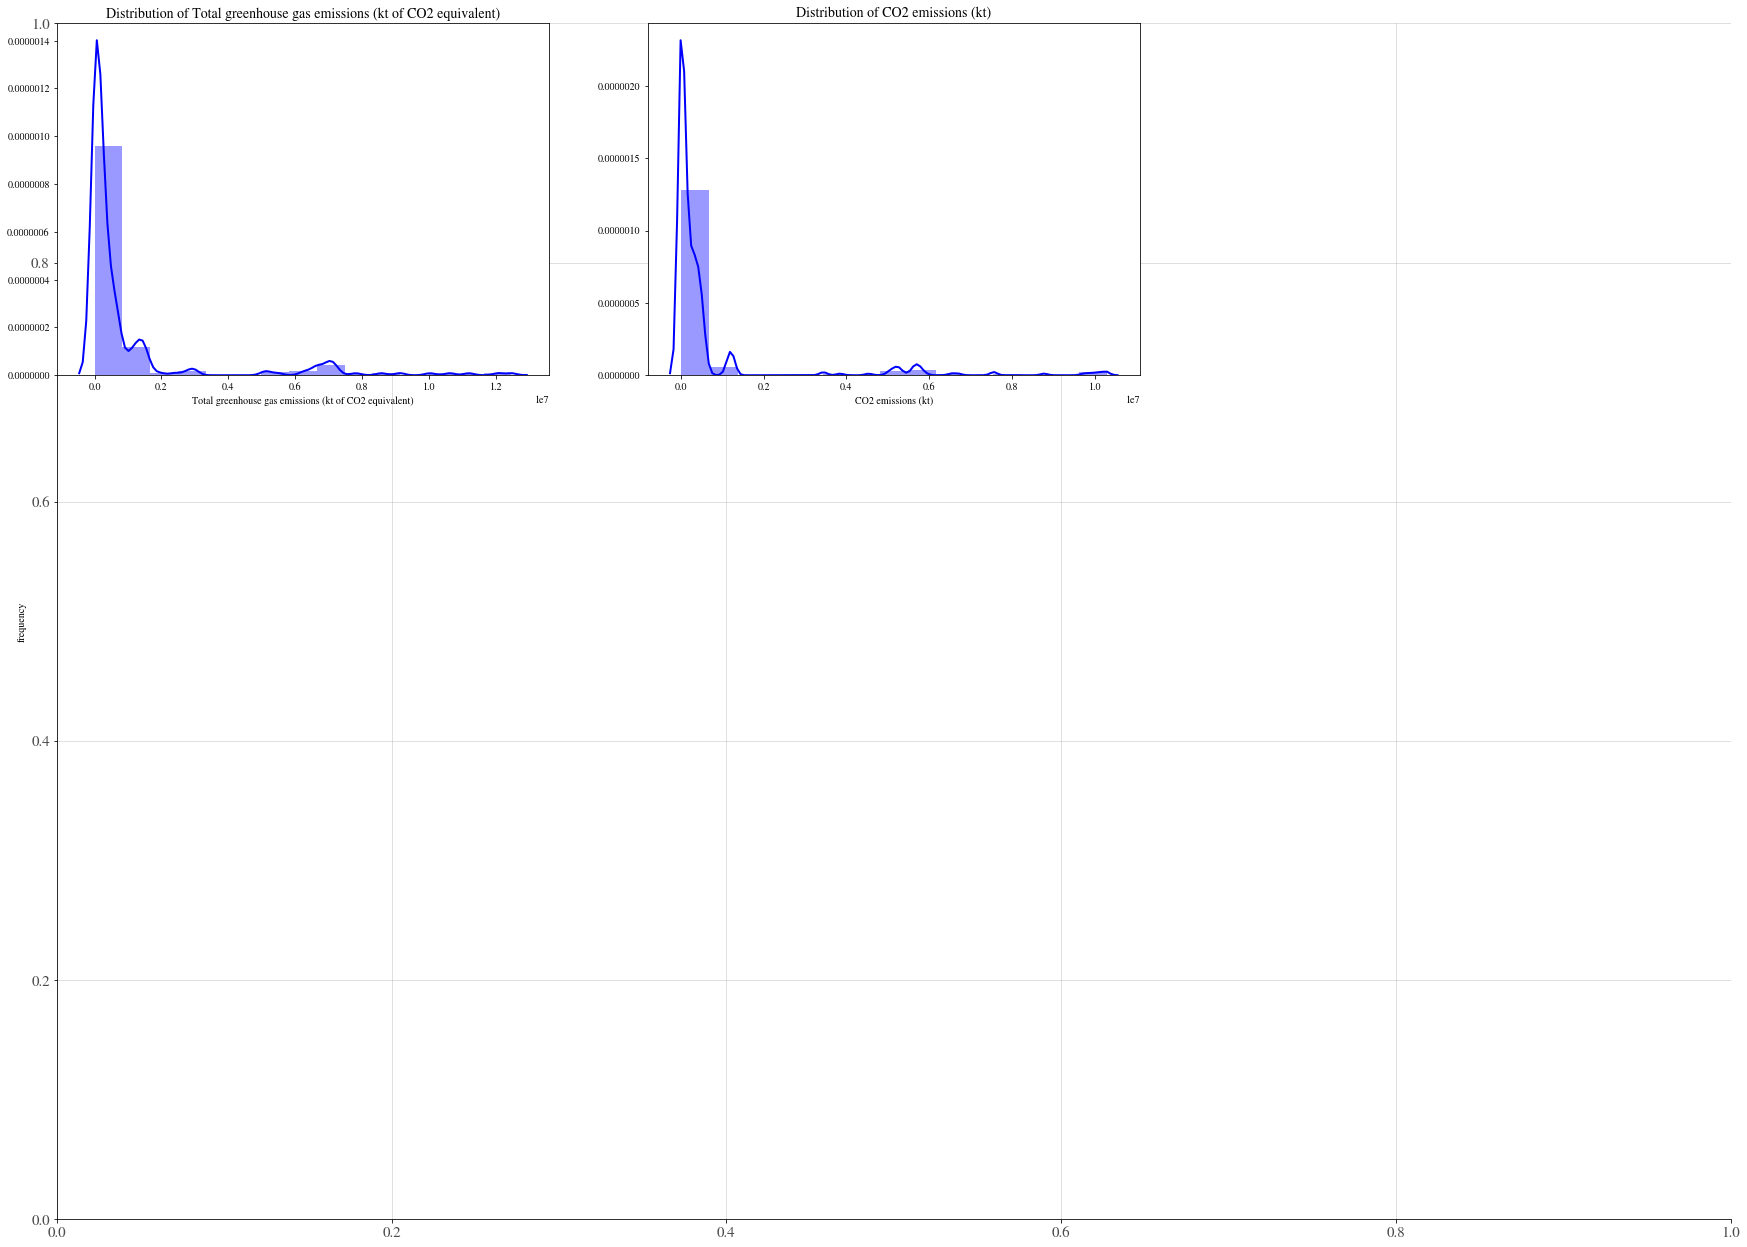

In [69]:
showDist(mySet, ['Total greenhouse gas emissions (kt of CO2 equivalent)','CO2 emissions (kt)'])

In [ ]:
showDist(mySet2, colList)

## Task one
**c** Integration

Here I started investigating what countries might be worth investigating. <br>
I had to progress quite a bit further before being able to define whether a set of countries I had used was a good fit, as such I used mulitple different sets on different iterations.

The dataset I selected had already been cleaned somewhat in the above functions so the merge was simple. <br>
From here the merge was fairly simple.

In [11]:
#Here I picked out the countries that I wished to work with, and then merged them into a single frame
#Initially I was using the first list of countries (canada, NZ, Aus, US, UK, Germany) but there was too much variance between these countries to be able to make a stable model
#I ended up experimenting with multiple different countries so that varience was displayed, but there was not too significant a difference between the countries (i.e USA compared to Japan, very different values and lifestyles)
#After experimenting with a few countries from different continents, I realised that some of the differences in value were to great to 

#mySet = result[(result['Country name'] == 'Canada') | (result['Country name'] == 'New Zealand') | (result['Country name'] == 'Australia') | (result['Country name'] == 'United States') | (result['Country name'] == 'United Kingdom') | (result['Country name'] == 'Germany')]
#mySet = result[(result['Country name'] == 'Austria') | (result['Country name'] == 'Netherlands') | (result['Country name'] == 'Switzerland') | (result['Country name'] == 'France') | (result['Country name'] == 'Belgium') | (result['Country name'] == 'Germany')]
result.replace({'Russian Federation' : 'Russia', 'Korea, Rep.' : 'South Korea','Egypt, Arab Rep.' : 'Egypt'}, regex=True, inplace = True)
mySet = result[(result['Country name'] == 'South Korea') |(result['Country name'] == 'China') | (result['Country name'] == 'India') | (result['Country name'] == 'Japan') | (result['Country name'] == 'Russia') | (result['Country name'] == 'Nepal')]

mySet['Country name'].unique()

mergeFrame = pd.merge(left = happyLad, right = mySet, left_on=['Country name', 'year'], right_on=['Country name', 'year'], how = 'inner')
mergeFrameAll = pd.merge(left = happyLad, right = result, left_on=['Country name', 'year'], right_on=['Country name', 'year'], how = 'inner')

mergeFrame.reset_index(drop=True, inplace = True)
mergeFrameAll.reset_index(drop=True, inplace = True)
mergeFrame.head(10)


Country name  year  Life Ladder  Rural population  \
0        China  2006     4.560495       735901746.0   
1        China  2007     4.862862       722214159.0   
2        China  2008     4.846295       708173810.0   
3        China  2009     4.454361       693852712.0   
4        China  2010     4.652737       679206337.0   
5        China  2011     5.037208       665196496.0   
6        China  2012     5.094917       651507733.0   
7        China  2013     5.241090       637792141.0   
8        China  2014     5.195619       624030741.0   
9        China  2015     5.303878       610192900.0   

   Rural population (% of total population)  Urban population  \
0                                    56.132       575118254.0   
1                                    54.801       595670841.0   
2                                    53.461       616481190.0   
3                                    52.120       637407288.0   
4                                    50.774       658498663.0   
5                                    49.489       678933504.0   
6                                    48.235       699187267.0   
7                                    46.987       719587859.0   
8                                    45.741       740239259.0   
9                                    44.500       761027100.0   

   Urban population (% of total population)  \
0                                    43.868   
1                                    45.199   
2                                    46.539   
3                                    47.880   
4                                    49.226   
5                                    50.511   
6                                    51.765   
7                                    53.013   
8                                    54.259   
9                                    55.500   

   Permanent cropland (% of land area)  \
0                             1.342109   
1                             1.411345   
2                             1.448625   
3                             1.491232   
4                             1.544490   
5                             1.619052   
6                             1.682962   
7                             1.704265   
8                             1.706395   
9                             1.704265   

   Electricity production from hydroelectric sources (% of total)  \
0                                          15.205617                
1                                          14.786565                
2                                          16.877871                
3                                          16.571464                
4                                          16.948974                
5                                          14.624130                
6                                          17.308734                
7                                          16.731349                
8                                          18.552494                
9                                          19.069813                

   Electricity production from oil, gas and coal sources (% of total)  \
0                                          82.493613                    
1                                          82.843479                    
2                                          80.289947                    
3                                          80.248373                    
4                                          79.401025                    
5                                          81.174003                    
6                                          77.859893                    
7                                          77.424467                    
8                                          74.822887                    
9                                          72.962076                    

   Forest area (% of land area)  \
0                     20.723563   
1                     20.884752   
2                     21.04594

## Task two
**a** EDA (data quality inspection)

Below there is some evaluation of the dataframes that I intend to use for the coming regression models. The main factor I investigated initially is the amount of null values that were included in both dataframes, and then how many rows were lost due to points of null data.

In [12]:
#The function below inspects two dataframes and provides printout of the differences between the two frames
#I have used it to show how much data was lost in the merge due to missing years or differences in columns
#df1 = An initial dataFrame
#df2 = An altered dataFrame
def inspectFrame(df1, df2):
    print("Items before merge: ", df1.size)
    print("Items after merge : ", df2.size)
    print("Years factored before merge: ", df1['year'].unique())
    print("Years factored after merge : ", df2['year'].unique())
    print("Null values before merge: ", df1.isna().sum())
    print("Null values after merge : ", df2.isna().sum())

inspectFrame(mySet, mergeFrame)

Items before merge:  1440
Items after merge :  1079
Years factored before merge:  [2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006
 2005 2004 2003 2002 2001 2000]
Years factored after merge :  [2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2005]
Null values before merge:  Country name                                                             0
year                                                                     0
Rural population                                                         6
Rural population (% of total population)                                 6
Urban population                                                         6
Urban population (% of total population)                                 6
Permanent cropland (% of land area)                                     18
Electricity production from hydroelectric sources (% of total)          24
Electricity production from oil, gas and coal sources (% of total)      24
Fores

In the merge around 400 rows of data were lost <br>
This can be explained by the next line, the WHI only the years from 2005 to 2019 are included<br>
The data obtained from the world bank index extends back significantly longer than this, the data i scraped was only from 2000 onwards<br>
If i had added data older than this more would have been lost<br>
The amount of null values in each column is within what I consider to be acceptable an acceptable range<br>
This is in part due to my earlier inspections to ensure that the data I was scrapping was not populated largely by null values<br>

In [13]:
#Here I print out all rows with null values in them
#It is aparent that there is limited data for Electricity production (both hydroelectric and from oil/gas/coal) in the years 2016-2019 for all the selected countries
#The data for Forest area (% of land area) and Access to clean fuels and technologies for cooking (% of population) from 2017-2019 was also absent
#Both of the above factors were true for each combination of countries I tried. After further investigation this data was missing from all countries metrics.

colList = mergeFrame.columns

mergeFrame[mergeFrame.isnull().any(axis=1)][colList]

Country name  year  Life Ladder  Rural population  \
10        China  2016     5.324956       596465626.0   
11        China  2017     5.099061       582840458.0   
12        China  2018     5.131434       568902350.0   
13        China  2019     5.144120               NaN   
24        India  2016     4.179177       885010817.0   
25        India  2017     4.046111       888869466.0   
26        India  2018     3.818069       892321651.0   
27        India  2019     3.248770               NaN   
38        Japan  2016     5.954651        10849141.0   
39        Japan  2017     5.910676        10732418.0   
40        Japan  2018     5.793575        10608200.0   
41        Japan  2019     5.908039               NaN   
52        Nepal  2016     5.099540        22097328.0   
53        Nepal  2017     4.736692        22285143.0   
54        Nepal  2018     4.910087        22543325.0   
55        Nepal  2019     5.448725               NaN   
66       Russia  2016     5.854946        37292301.0   
67       Russia  2017     5.578743        37147222.0   
68       Russia  2018     5.513500        36938703.0   
79  South Korea  2016     5.970564         9443539.0   
80  South Korea  2017     5.873887         9500413.0   
81  South Korea  2018     5.840231         9568386.0   
82  South Korea  2019     5.902817               NaN   

    Rural population (% of total population)  Urban population  \
10                                    43.264       782199374.0   
11                                    42.040       803554542.0   
12                                    40.848       823827650.0   
13                                       NaN               NaN   
24                                    66.818       439498772.0   
25                                    66.400       449789369.0   
26                                    65.970       460295677.0   
27                                       NaN               NaN   
38                                     8.543       116145370.0   
39                                     8.465       116053379.0   
40                                     8.384       115920900.0   
41                                       NaN               NaN   
52                                    81.058         5163803.0   
53                                    80.664         5341981.0   
54                                    80.260         5544546.0   
55                                       NaN               NaN   
66                                    25.836       107050095.0   
67                                    25.708       107349518.0   
68                                    25.567       107539347.0   
79                                    18.438        41774264.0   
80                                    18.497        41861498.0   
81                                    18.541        42038247.0   
82                                       NaN               NaN   

    Urban population (% of total population)  \
10                                    56.736   
11                                    57.960   
12                                    59.152   
13                                       NaN   
24                                    33.182   
25                                    33.600   
26                                    34.030   
27                                       NaN   
38                                    91.457   
39                                    91.535   
40                                    91.616   
41                                       NaN   
52                                    18.942   
53                                    19.336   
54                                    19.740   
55                                       NaN   
66                                    74.164   
67                                    74.292   
68                                    74.433   
79                                    81.562   
80                                    81.503   
81               

In [14]:
#Here I am just ensuring that the data in my merged frame is contiguous with the data in my scrapped set
#It appears that the values that were missing from my initial scrape were also missing from the final merge
#This means that the data was not available from the world bank, and was not lost in my merge
mySet[['year','Country name','Electricity production from hydroelectric sources (% of total)','Electricity production from oil, gas and coal sources (% of total)','Forest area (% of land area)','Access to clean fuels and technologies for cooking (% of population)']].head(5)

year Country name  \
1760  2019        China   
1761  2018        China   
1762  2017        China   
1763  2016        China   
1764  2015        China   

      Electricity production from hydroelectric sources (% of total)  \
1760                                                NaN                
1761                                                NaN                
1762                                                NaN                
1763                                                NaN                
1764                                          19.069813                

      Electricity production from oil, gas and coal sources (% of total)  \
1760                                                NaN                    
1761                                                NaN                    
1762                                                NaN                    
1763                                                NaN                    
1764                                          72.962076                    

      Forest area (% of land area)  \
1760                           NaN   
1761                           NaN   
1762                           NaN   
1763                     22.353942   
1764                     22.189669   

      Access to clean fuels and technologies for cooking (% of population)  
1760                                                NaN                     
1761                                                NaN                     
1762                                                NaN                     
1763                                              59.26                     
1764                                              58.54

In [15]:
mergeFrameAll.to_csv("Assignment3DataSet.csv")

## Task two
**b** EDA (Search for good predictors)
The Rural pop frames for both pairplots were dropped, as this was just the inverse of the urban data (ie the urban can be explained 100% by rural).<br>
Two different frames were made for the plots, as having all the data on one plot was harder to visualise and this way is easier to observe trends at a tertiary look.<br>
The groups below were made of columns that shared more in common so trend would be more apparent.<br>

After this two initial pairplots were made for analysis, so any necessary changes to frame could be made. Then a final pair plot was made to visualise all the data that would be incorporated could be visualised together. <br>
A scatter matrix was also included below this as an alternative to the pairplot as there are some differences visually.<br>

The final graph included was a series of histograms showing the scaled distributions of all of the columns I intended to use in my regression models.<br>

After all the graphs there are several more frames which show relationships and correlations between the data that will be included in the models to be made in the later sections of this report.

In [16]:


plotFrame = mergeFrame.drop(columns = ['year', 'Rural population (% of total population)', 'Rural population'])
plotFrame1 = plotFrame.drop(columns = ['Urban population', 'Electricity production from hydroelectric sources (% of total)', 'Access to clean fuels and technologies for cooking (% of population)'])
plotFrame2 = plotFrame.drop(columns = ['Urban population (% of total population)', 'Permanent cropland (% of land area)', 'Forest area (% of land area)', 'Population density (people per sq. km of land area)'])


C:\Users\Stein\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Stein\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Stein\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Stein\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,

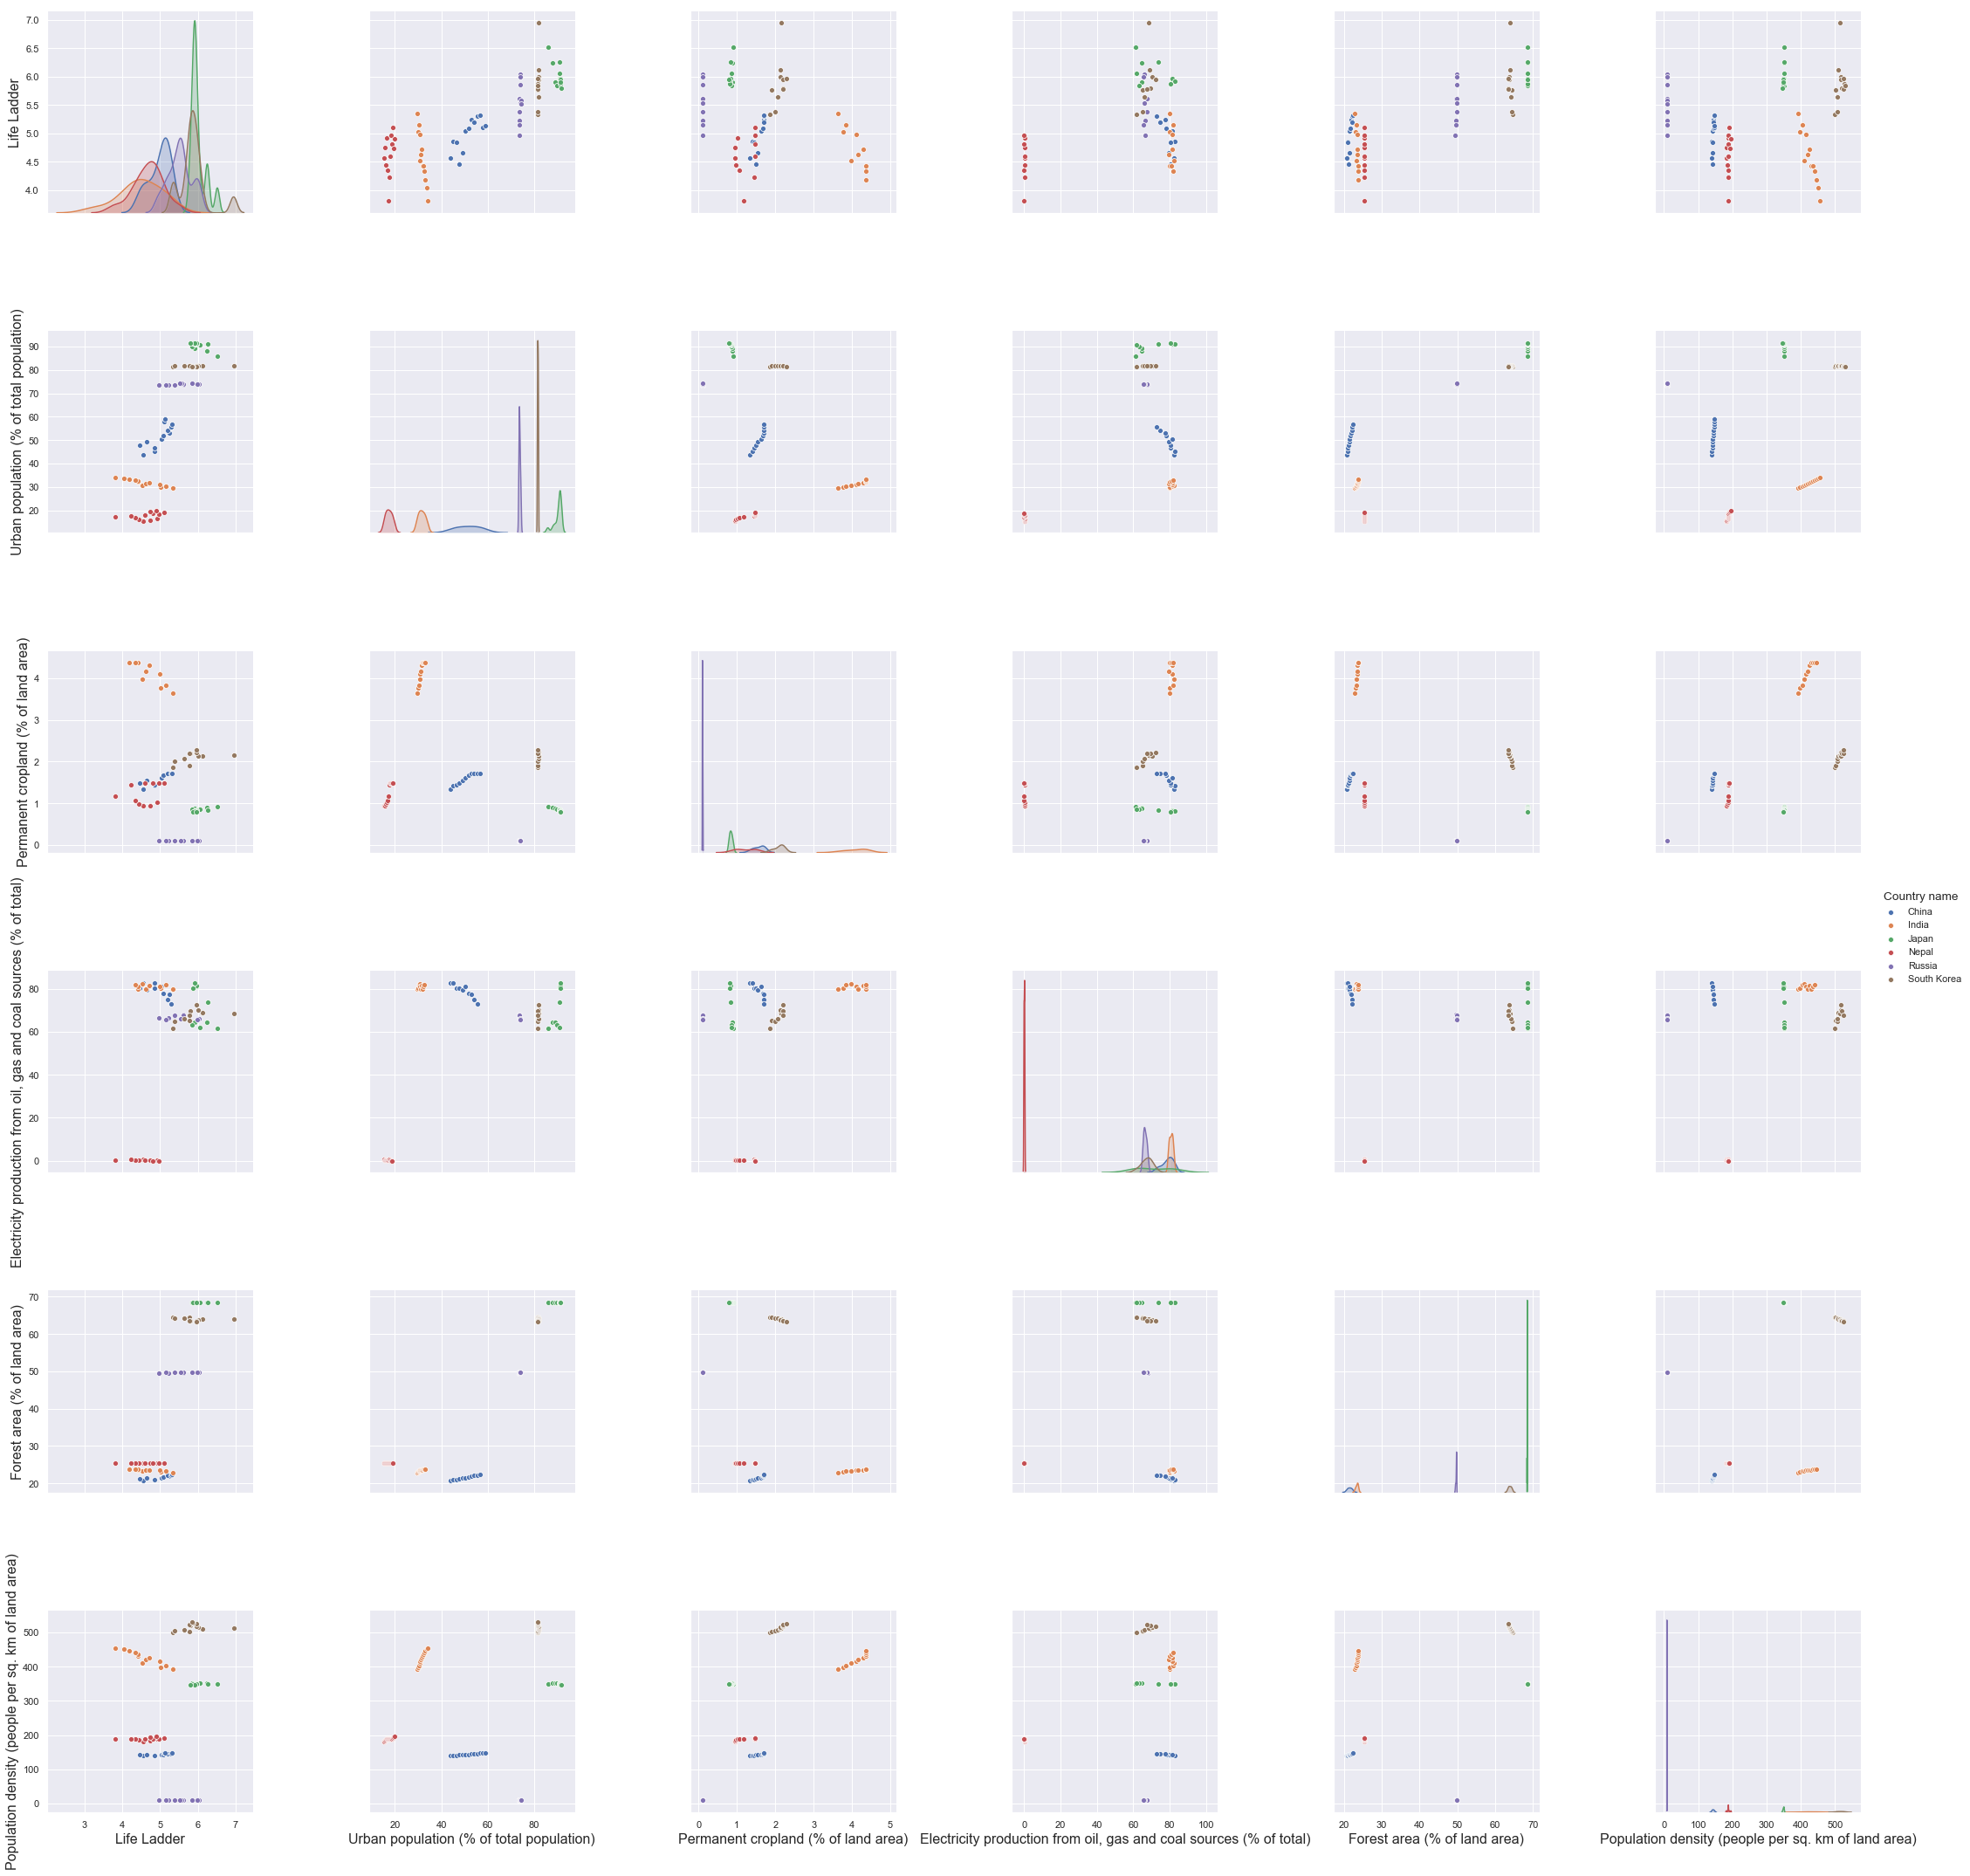

In [17]:
sns.set(color_codes=True)
sns.set_context(rc={"axes.labelsize":16})
sns.pairplot(plotFrame1, height =5, hue="Country name")

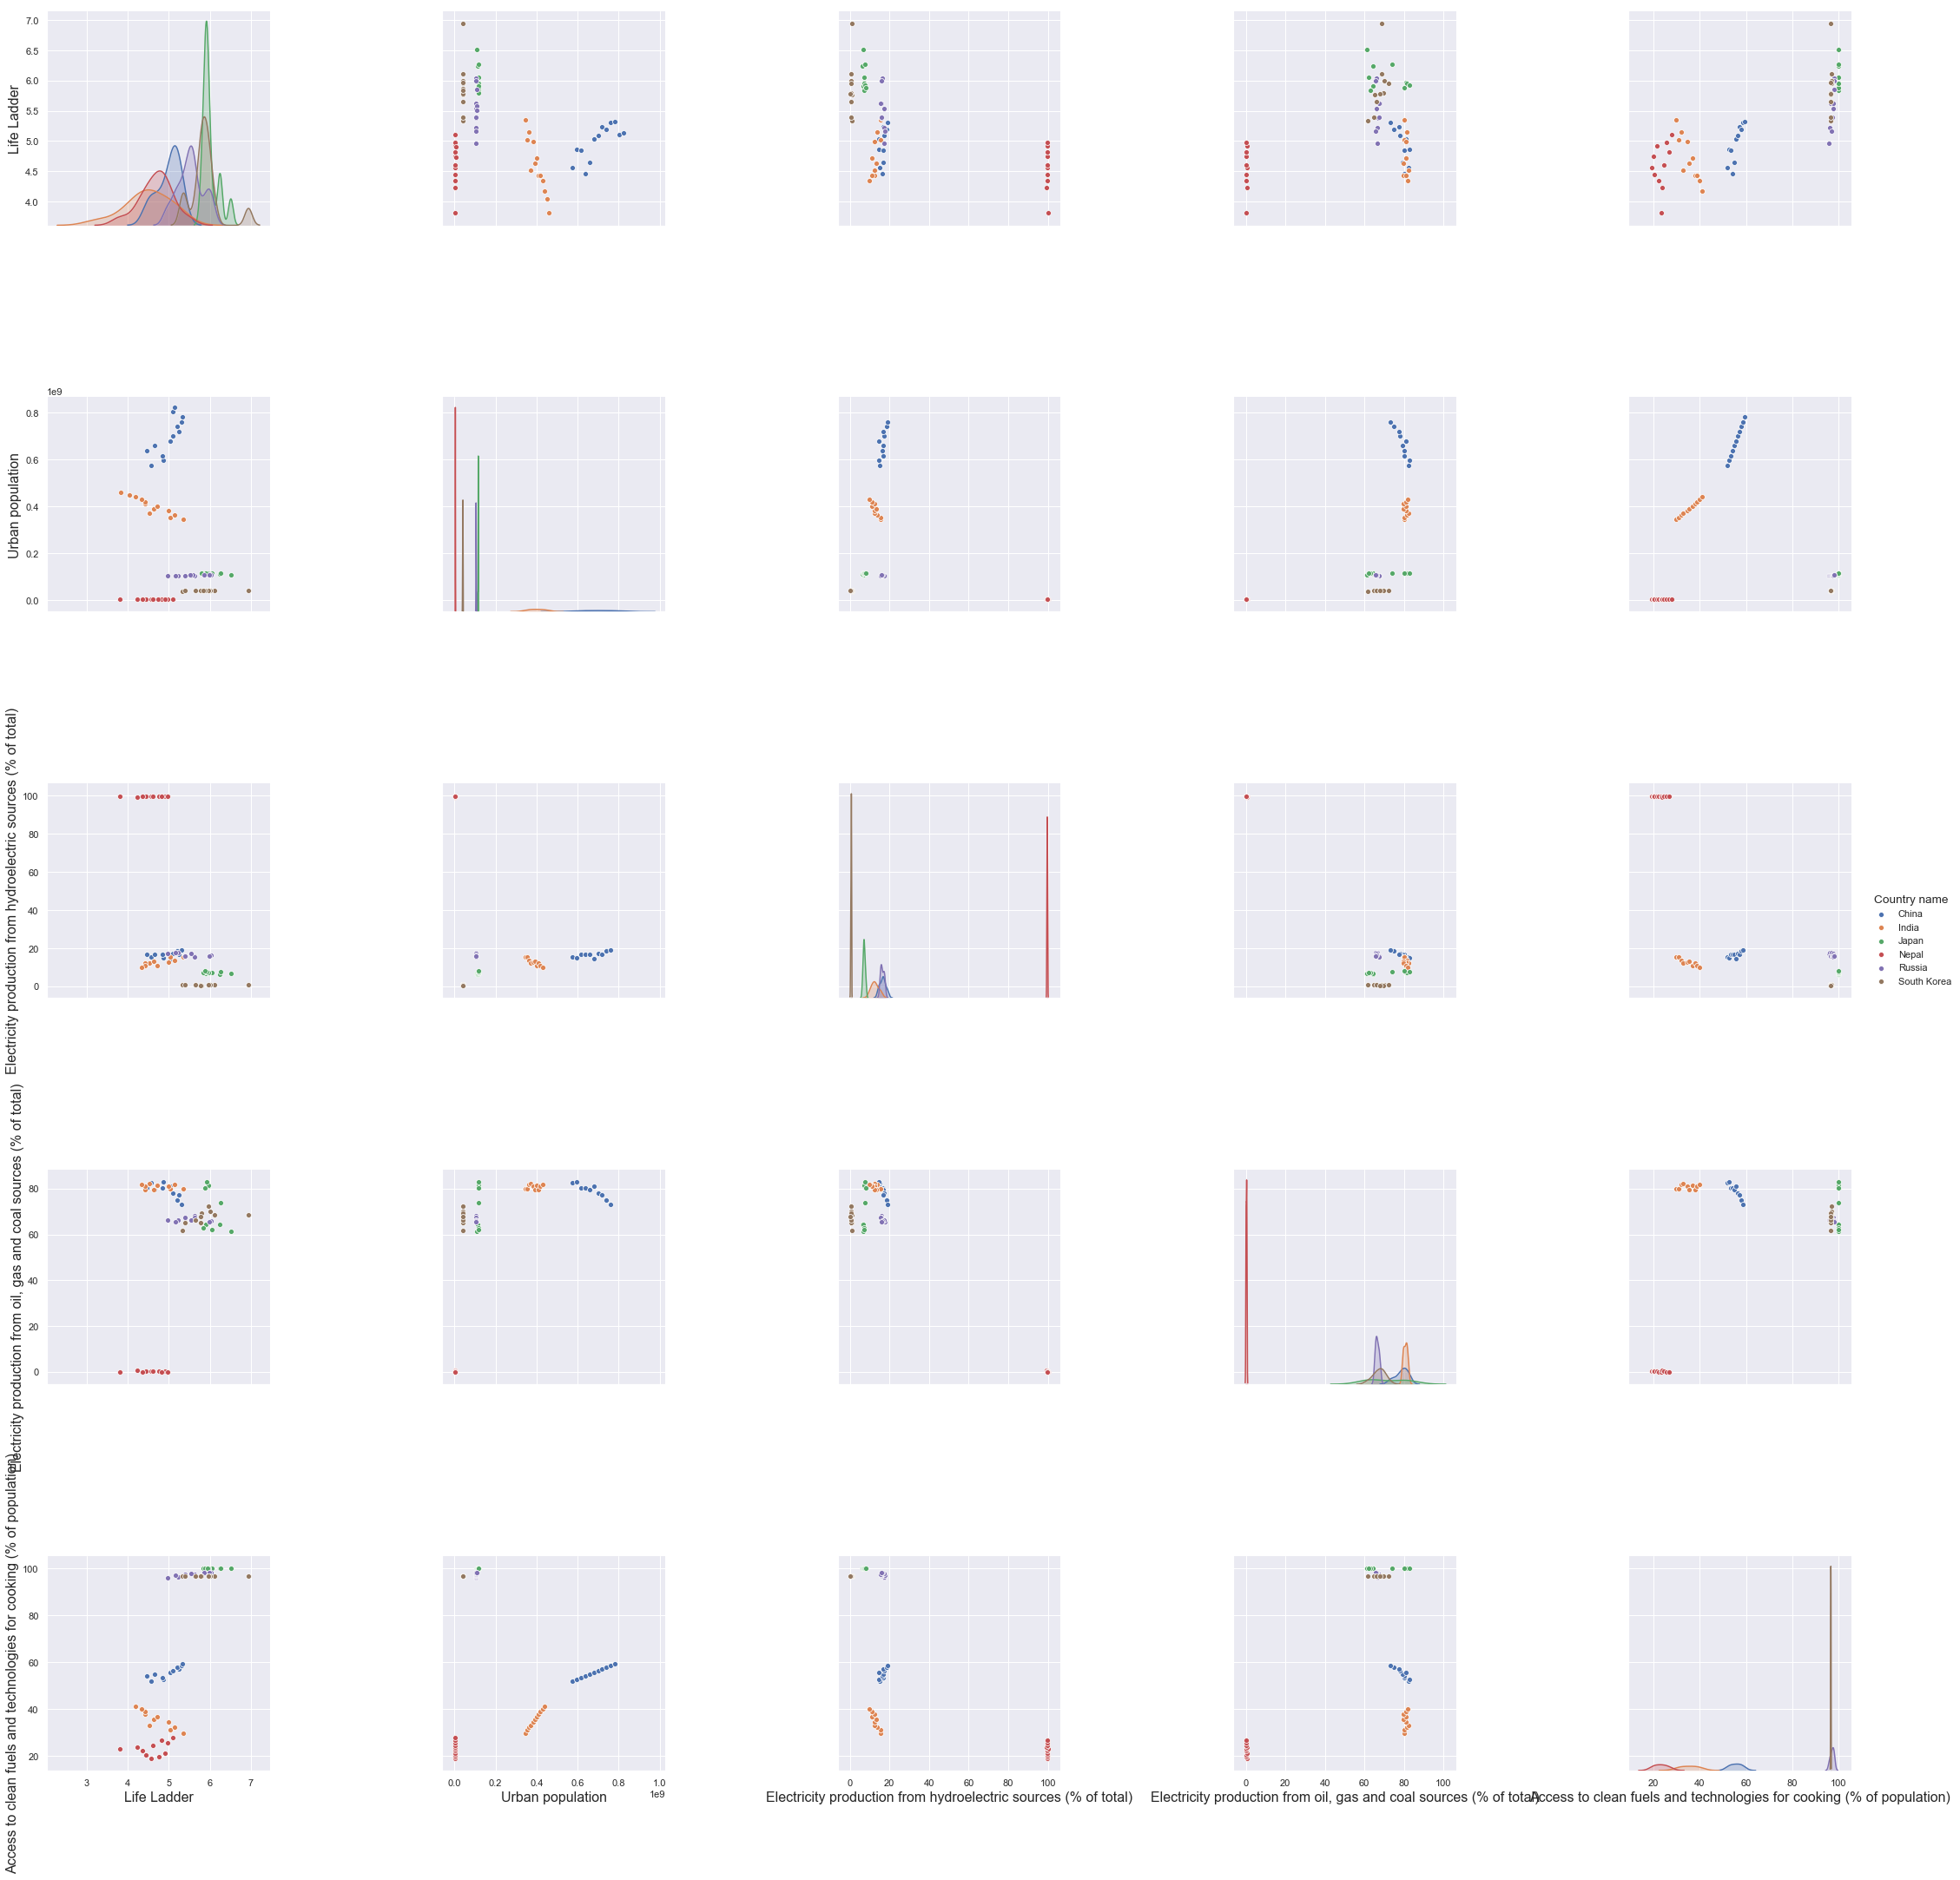

In [18]:
sns.set(color_codes=True)
sns.set_context(rc={"axes.labelsize":16})
sns.pairplot(plotFrame2, height=6, hue="Country name")


After seeing the data above I will make the following changes to the set I am investigating reasoning will be bulleted below each point<br>

In earlier sets I dropped the 'Access to clean fuels and technologies for cooking (% of population)' column
- Many of the initially selected countries were first world and all sat at 100%
- After selecting my finalised set of countries (China, Nepal, Japan, Russia and India) I decided to keep it in as I believe it will provide worth to the model

I am going to drop both 'Urban population' and 'Rural population' <br>
- A majority of the factors I am investigating are working from %
- The significantly higher population in certain countries has the potential to skew data sets and make graphs harder to manage

In earlier experiments I dropped 'Permanent cropland (% of land area)' <br>
- It does not contribute any meaningful data to the sets I have selected
- It showed a lower correlation to life ladder than all but my 'Population Density' variable
In the end the column was left in as it has no effect on my selected final model, and  it does provide some interesting points to the plots.<br>
It was also used as a factor in the Cluster and Supervised models and leaving it in was more consistent.

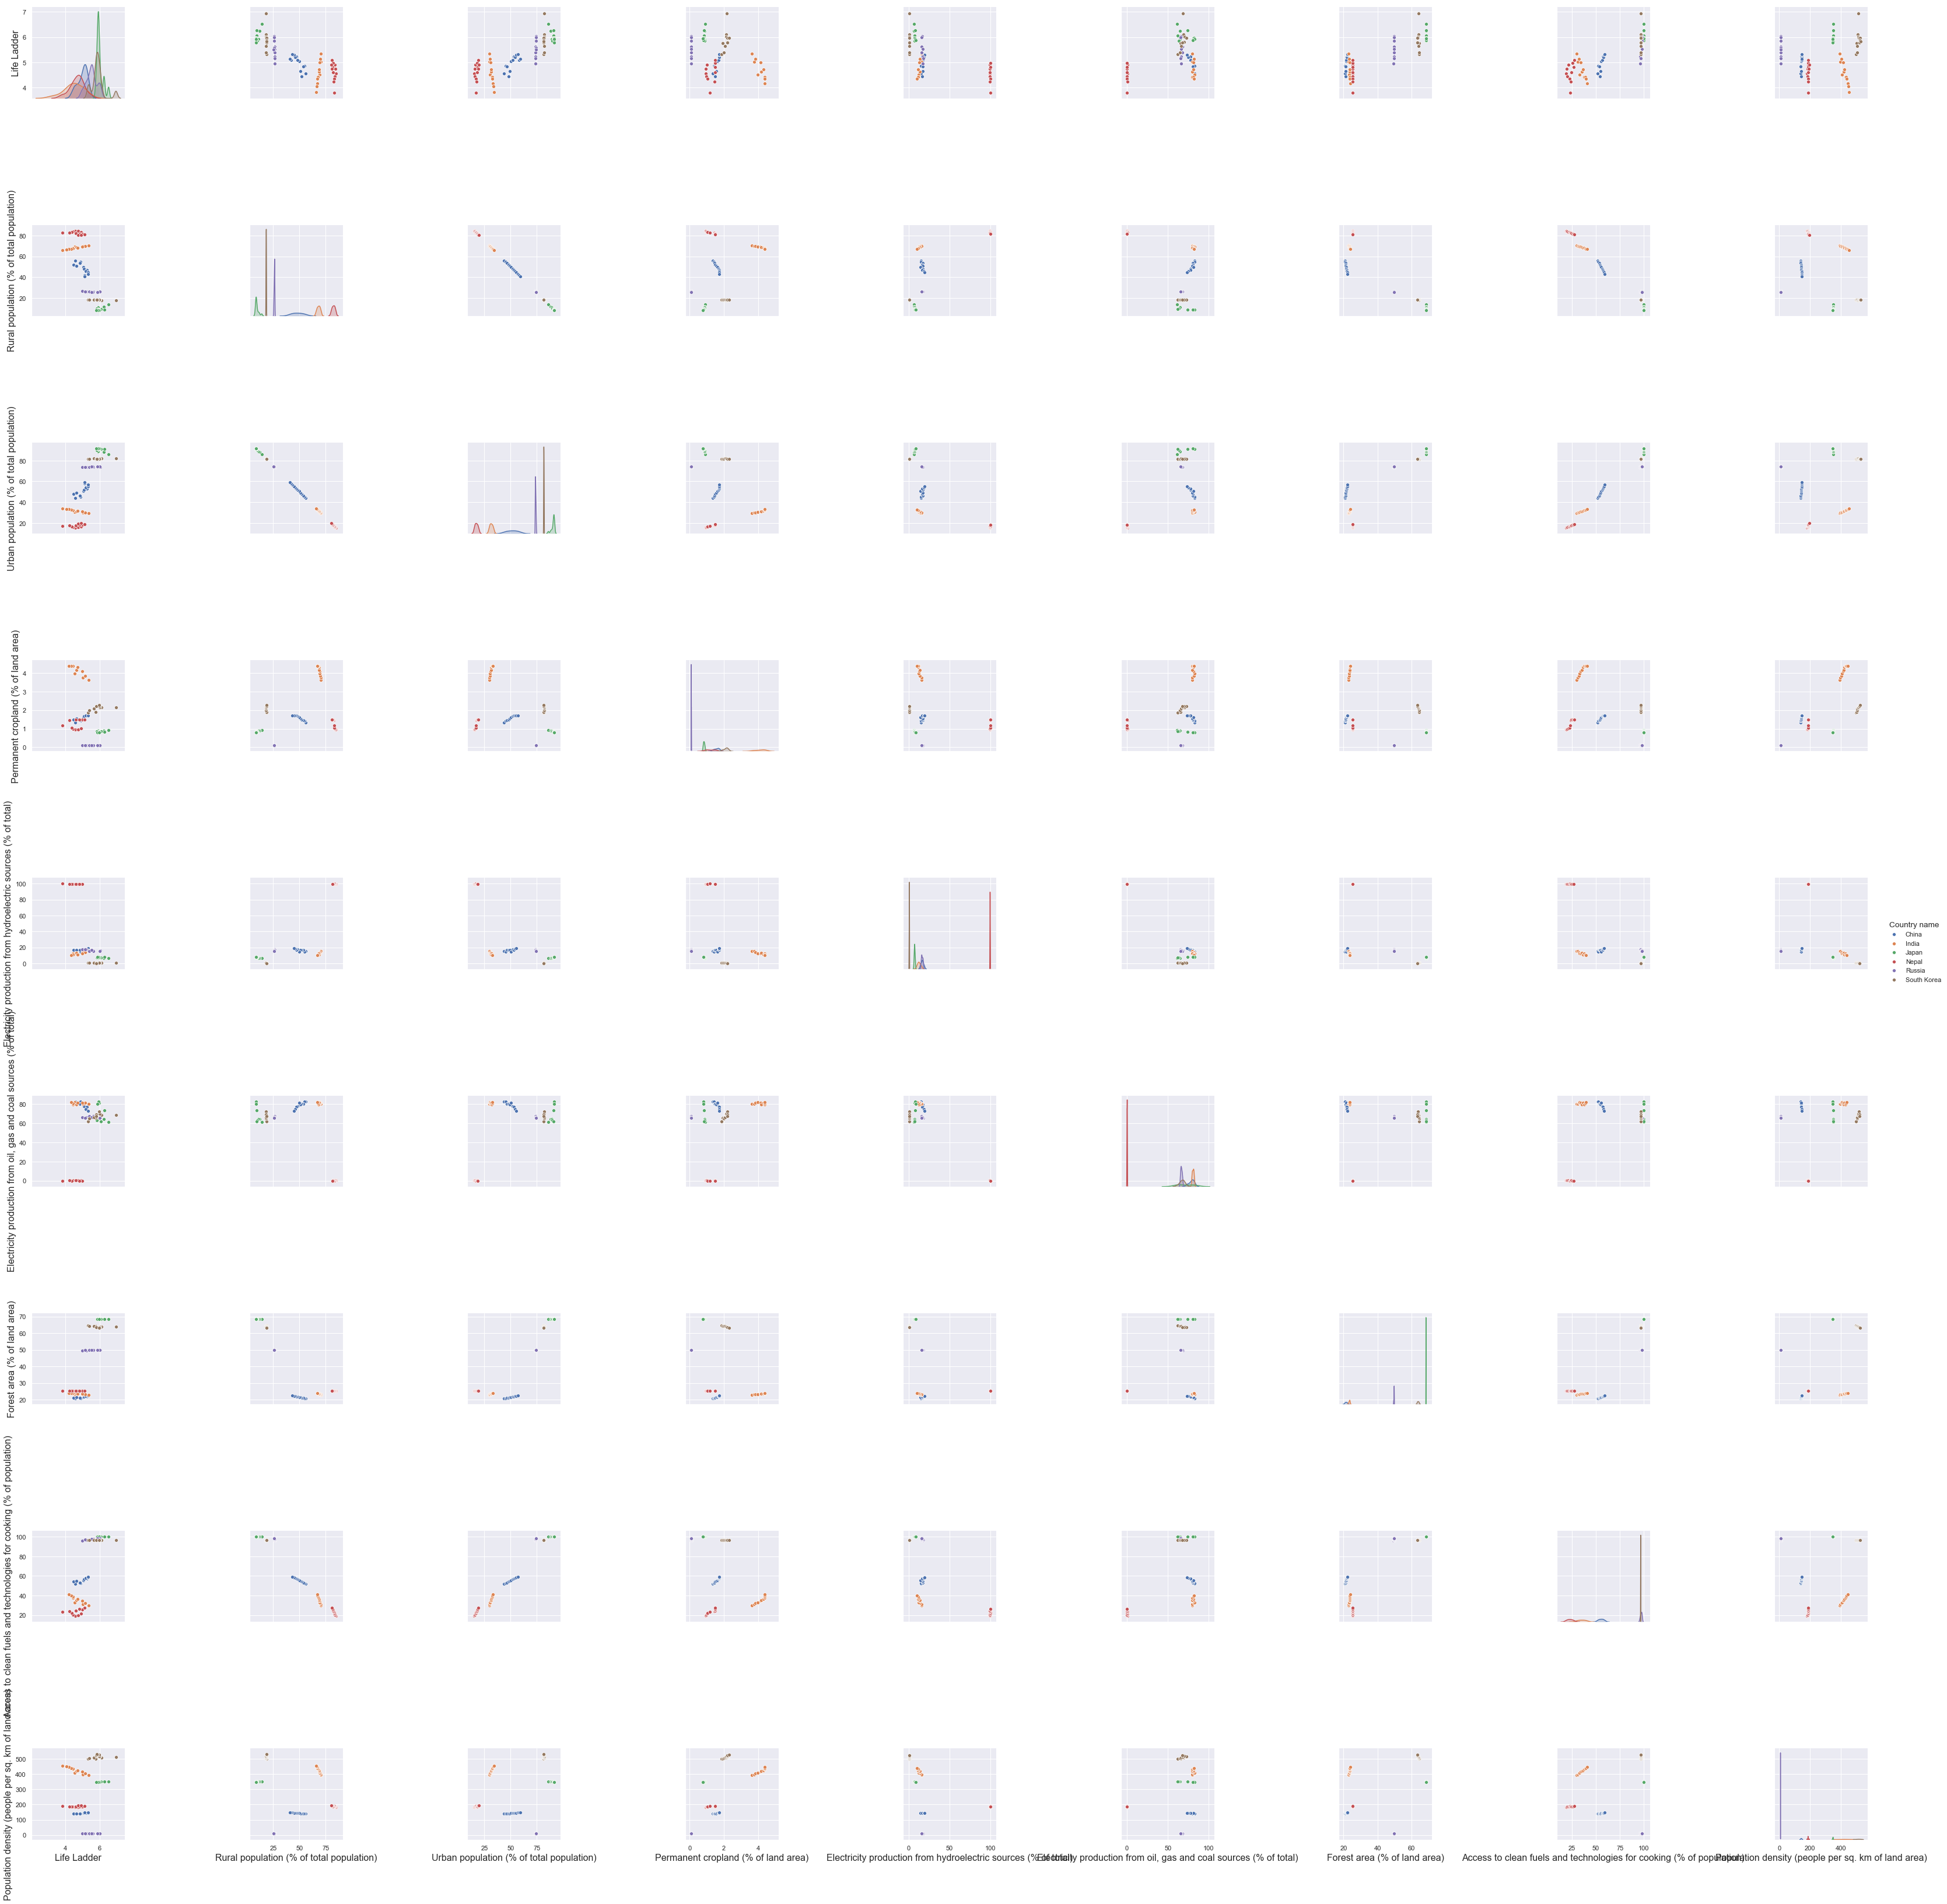

In [19]:
#Below are two visualisations of the dataframe I intend to use to create my model
finalSet = mergeFrame.drop(columns = ['Urban population', 'Rural population'])#, 'Permanent cropland (% of land area)'])
finalSet.reset_index(drop=True, inplace = True)

plotFrame = finalSet.drop(columns = 'year')
sns.pairplot(plotFrame, height =5, hue="Country name")

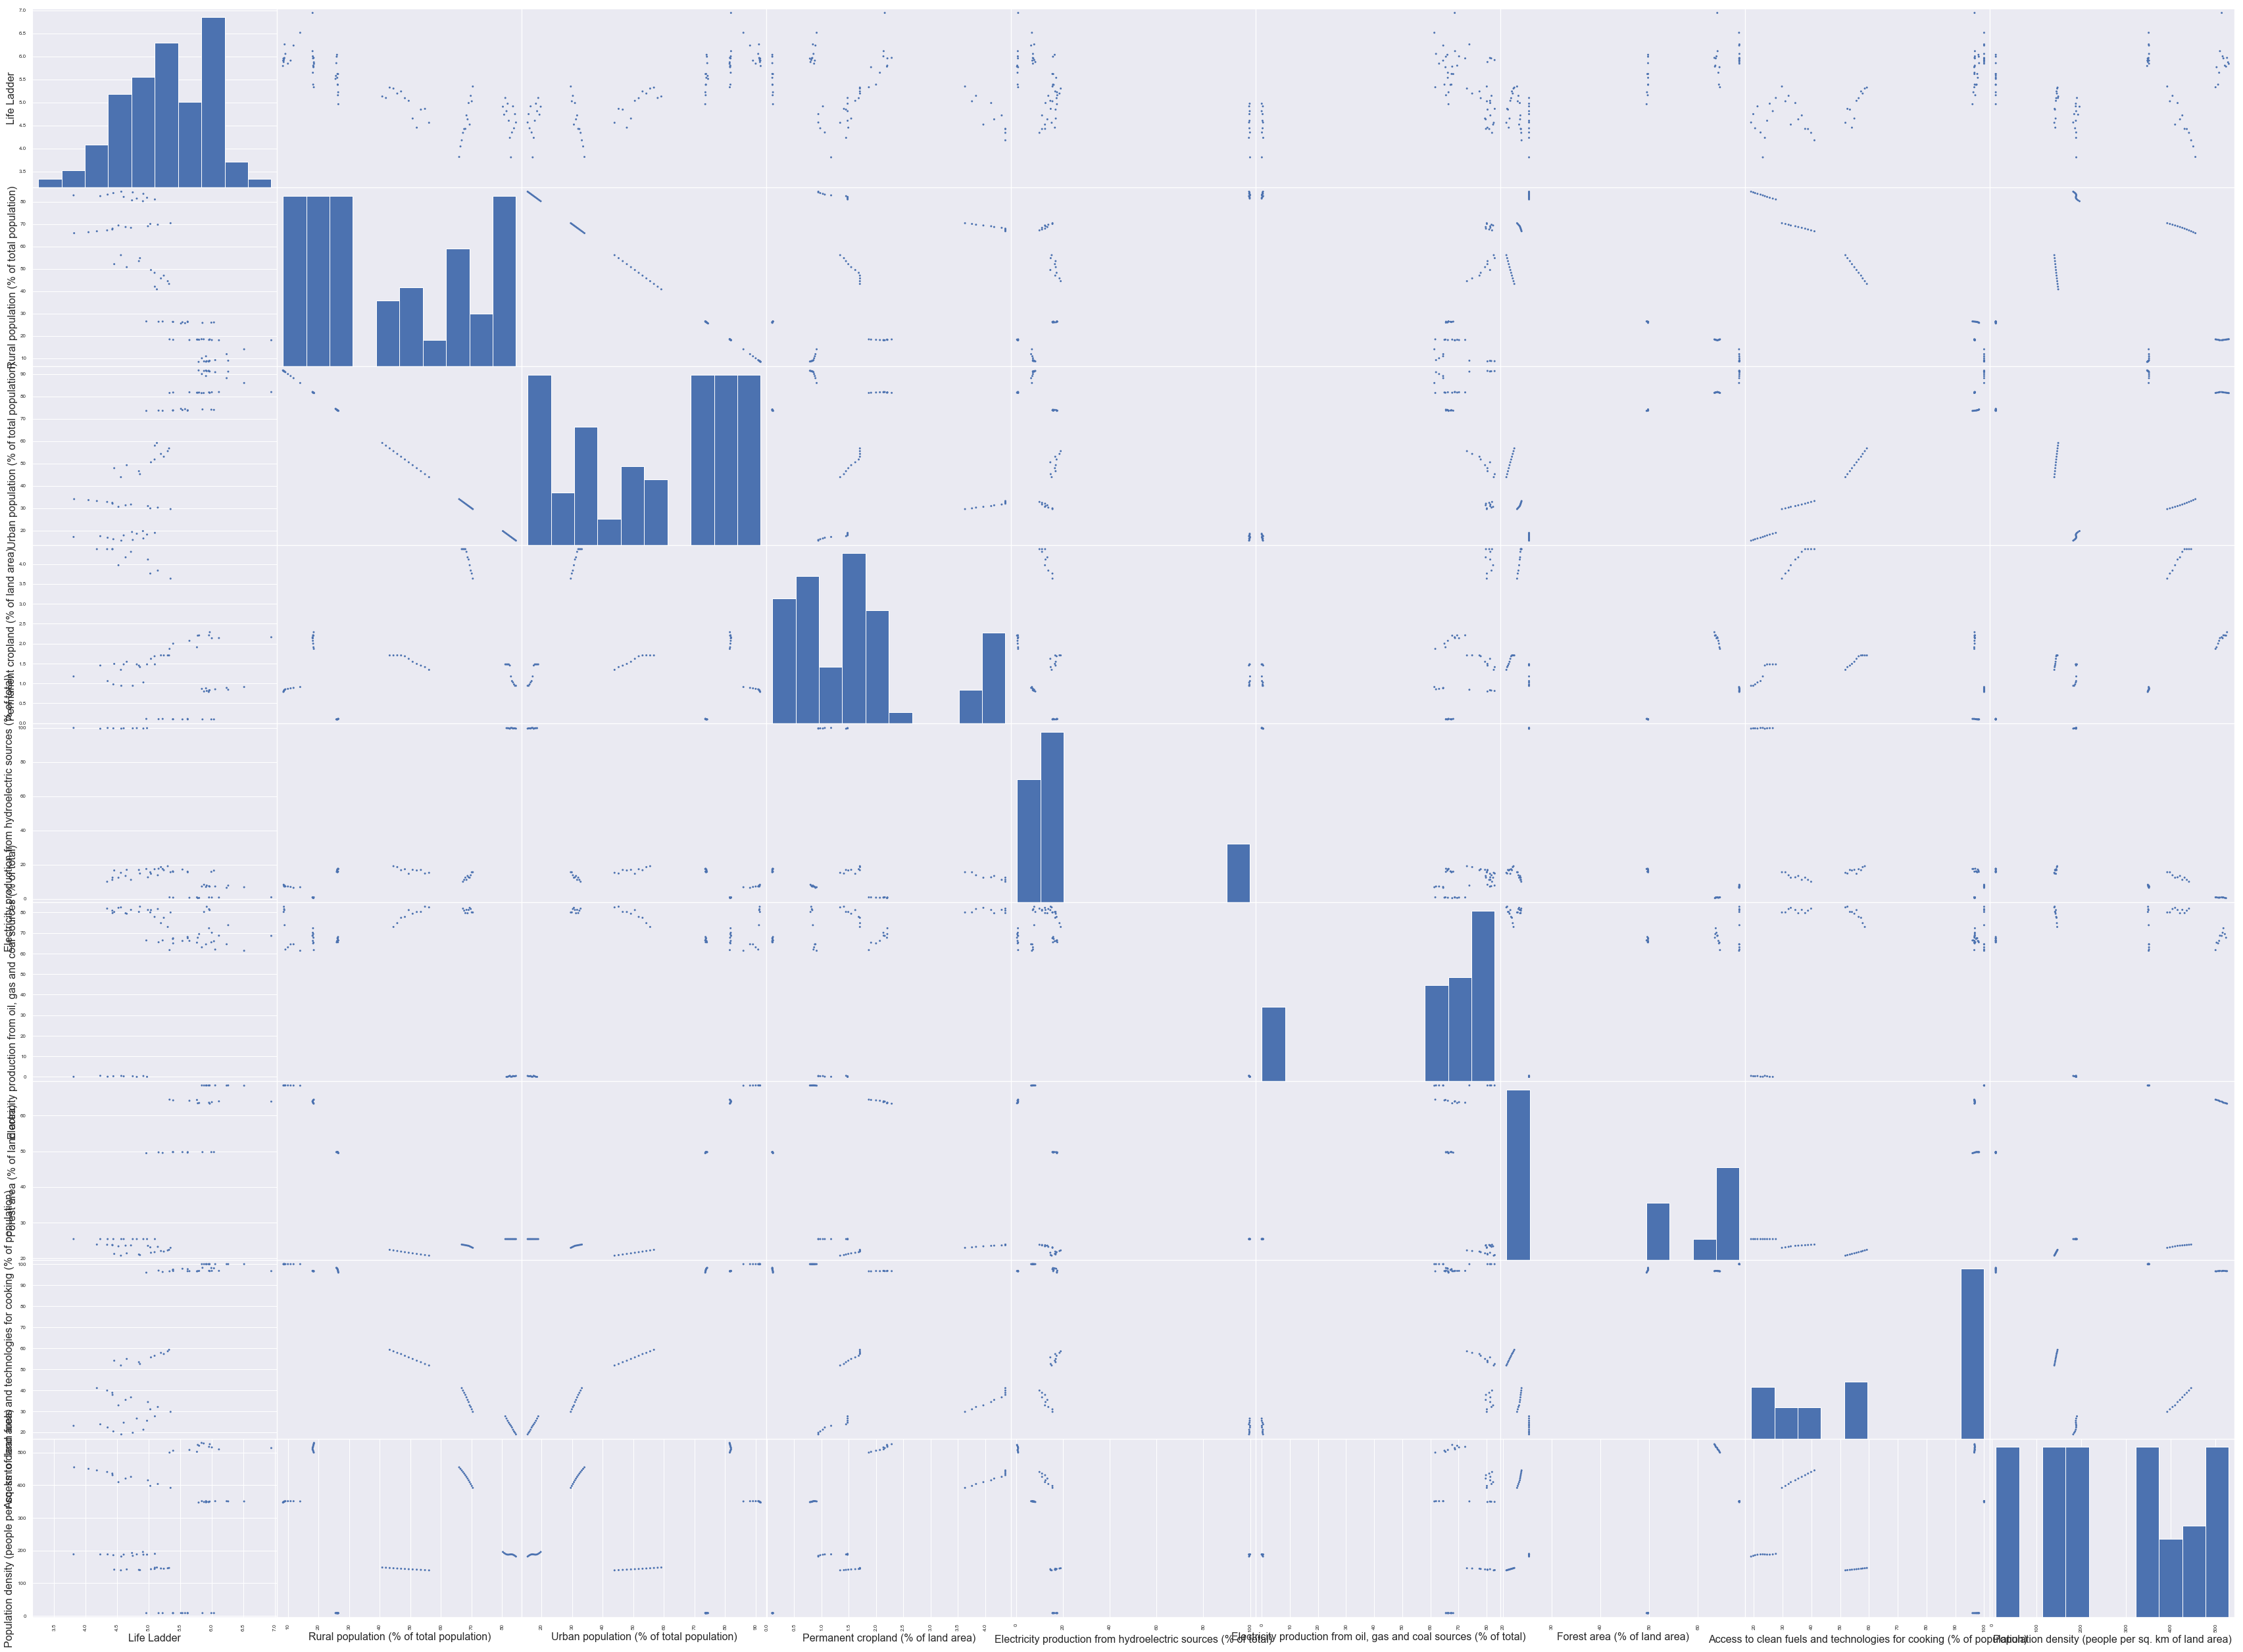

In [20]:
#This is a little hard to visualise, but the central histgrams give a good indication of distribution
pair2 = pd.plotting.scatter_matrix(plotFrame, alpha=1, figsize=(60, 45), diagonal='hist')


In [68]:
def showDist(df, colList):
    rcParams['figure.figsize'] = 16, 10
    rcParams["xtick.labelsize"] = 10
    fig = plt.figure(figsize = (30,22))
    plt.grid(alpha=0.5)
    plt.ylabel('frequency')
    plt.xticks(fontsize=15, alpha=0.7)
    plt.yticks(fontsize=15, alpha=0.7)
    sns.despine()
    indx=331
    for x in colList:
        fig.add_subplot(indx)
        sns.distplot(df[x], bins=15, color='blue')
        plt.title("Distribution of " + x, fontsize=14)
        plt.xlabel(x)
        indx+=1
        

C:\Users\Stein\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Stein\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


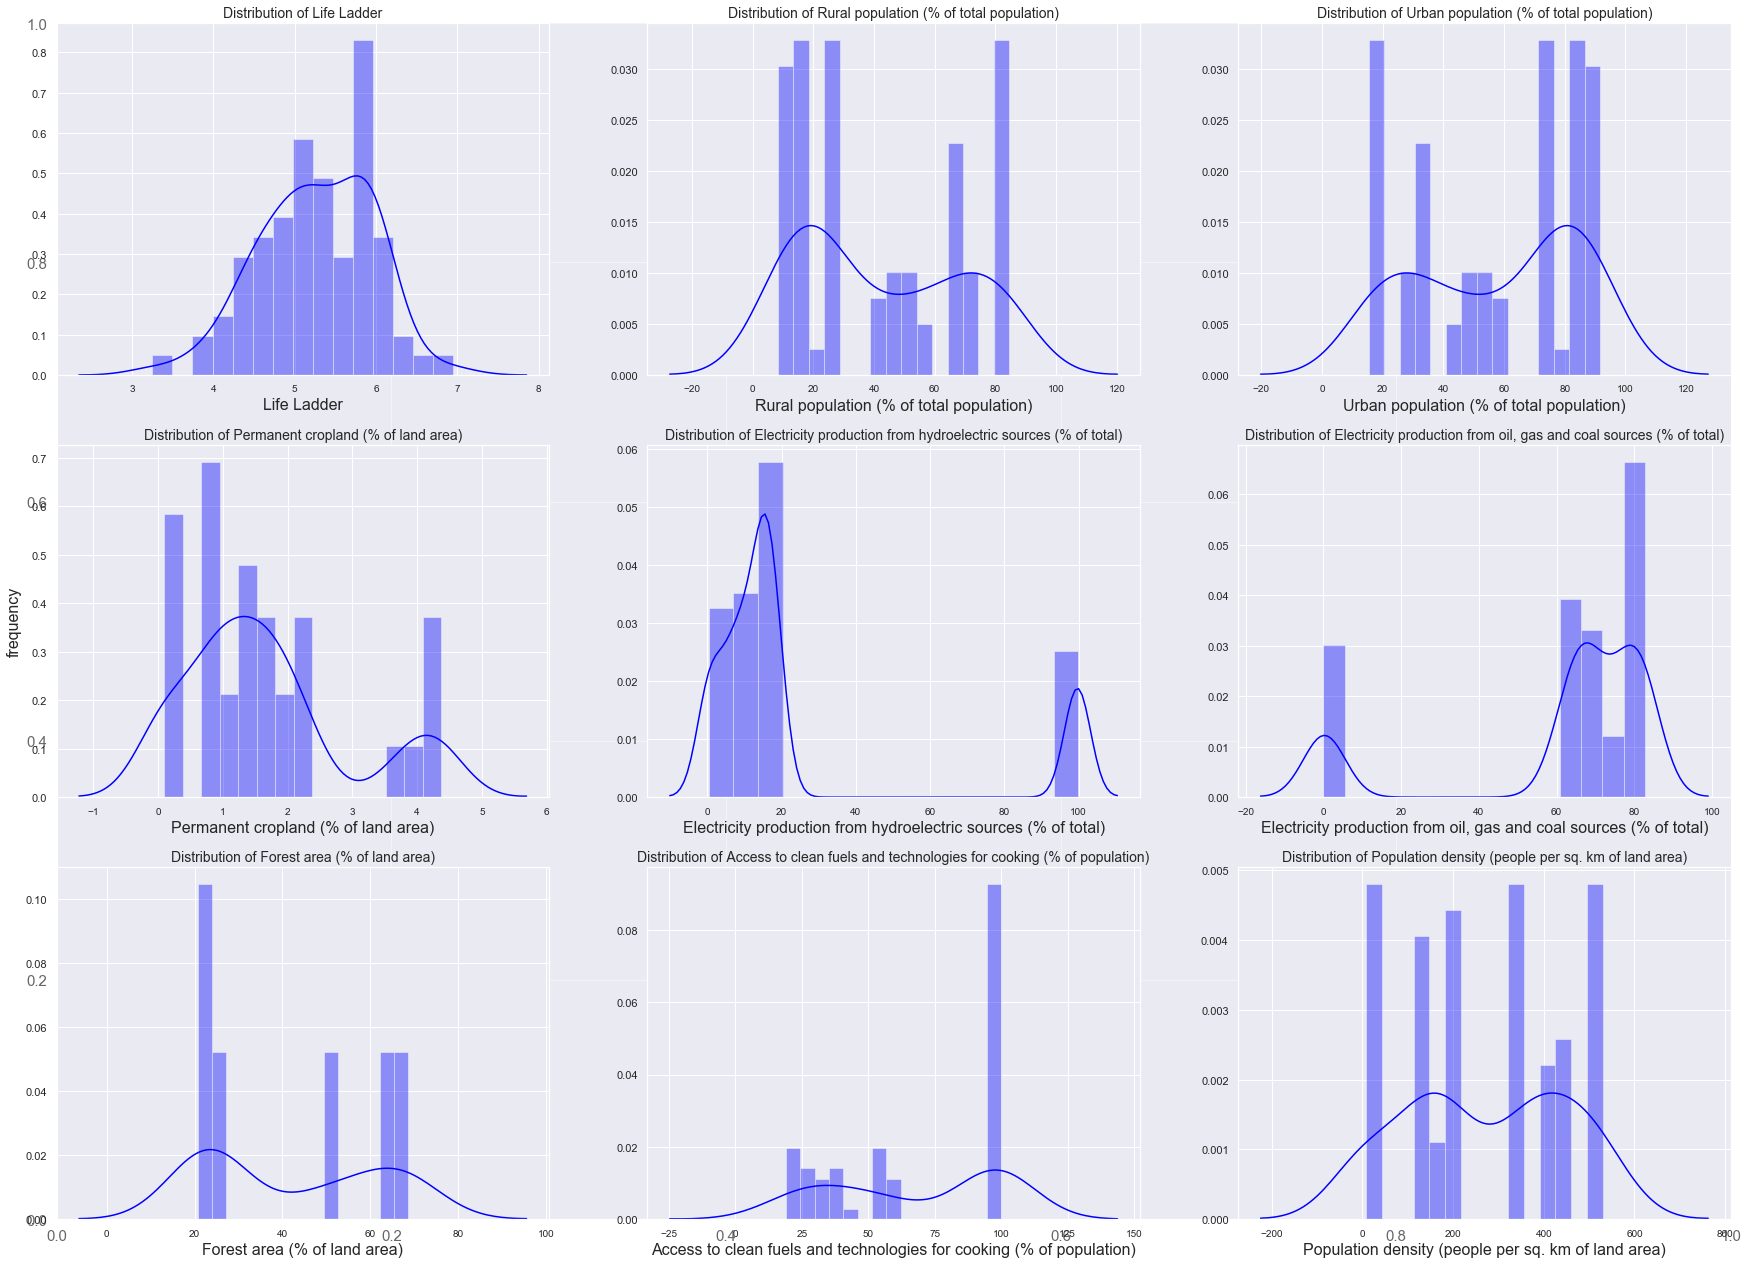

In [22]:
colList = list(finalSet.columns.values.tolist())
del colList[0:2]
showDist(finalSet, colList)


In [23]:
finalSet.corr()

year  Life Ladder  \
year                                                1.000000    -0.002486   
Life Ladder                                        -0.002486     1.000000   
Rural population (% of total population)           -0.052584    -0.843512   
Urban population (% of total population)            0.052584     0.843512   
Permanent cropland (% of land area)                 0.090519    -0.366391   
Electricity production from hydroelectric sourc...  0.000615    -0.568131   
Electricity production from oil, gas and coal s...  0.041755     0.367337   
Forest area (% of land area)                       -0.002033     0.836088   
Access to clean fuels and technologies for cook...  0.044508     0.827598   
Population density (people per sq. km of land a...  0.030235     0.171082   

                                                    Rural population (% of total population)  \
year                                                                               -0.052584   
Life Ladder                                                                        -0.843512   
Rural population (% of total population)                                            1.000000   
Urban population (% of total population)                                           -1.000000   
Permanent cropland (% of land area)                                                 0.423125   
Electricity production from hydroelectric sourc...                                  0.727643   
Electricity production from oil, gas and coal s...                                 -0.530983   
Forest area (% of land area)                                                       -0.901783   
Access to clean fuels and technologies for cook...                                 -0.984289   
Population density (people per sq. km of land a...                                 -0.155702   

                                                    Urban population (% of total population)  \
year                                                                                0.052584   
Life Ladder                                                                         0.843512   
Rural population (% of total population)                                           -1.000000   
Urban population (% of total population)                                            1.000000   
Permanent cropland (% of land area)                                                -0.423125   
Electricity production from hydroelectric sourc...                                 -0.727643   
Electricity production from oil, gas and coal s...                                  0.530983   
Forest area (% of land area)                                                        0.901783   
Access to clean fuels and technologies for cook...                                  0.984289   
Population density (people per sq. km of land a...                                  0.155702   

                                                    Permanent cropland (% of land area)  \
year                                                                           0.090519   
Life Ladder                                                                   -0.366391   
Rural population (% of total population)                                       0.423125   
Urban population (% of total population)                                      -0.423125   
Permanent cropland (% of land area)                                            1.000000   
Electricity production from hydroelectric sourc...                            -0.182313   
Electricity production from oil, gas and coal s...                             0.282459   
Forest area (% of land area)                                                  -0.405987   
Access to clean fuels and technologies for cook...                            -0.485378   
Population density (people per sq. km of land a...                             0.660586   

                                                    Electricity production from hydroelectri

In [24]:
finalSet.describe()

year  Life Ladder  Rural population (% of total population)  \
count    83.000000    83.000000                                 78.000000   
mean   2012.409639     5.262713                                 42.198359   
std       4.036529     0.687708                                 26.820366   
min    2005.000000     3.248770                                  8.384000   
25%    2009.000000     4.780360                                 18.311250   
50%    2012.000000     5.303878                                 33.670000   
75%    2016.000000     5.864416                                 68.273750   
max    2019.000000     6.946599                                 84.538000   

       Urban population (% of total population)  \
count                                 78.000000   
mean                                  57.801641   
std                                   26.820366   
min                                   15.462000   
25%                                   31.726250   
50%                                   66.330000   
75%                                   81.688750   
max                                   91.616000   

       Permanent cropland (% of land area)  \
count                            66.000000   
mean                              1.662376   
std                               1.279586   
min                               0.097699   
25%                               0.844869   
50%                               1.478898   
75%                               2.138799   
max                               4.372408   

       Electricity production from hydroelectric sources (% of total)  \
count                                          60.000000                
mean                                           25.606536                
std                                            33.900132                
min                                             0.390732                
25%                                             7.207759                
50%                                            14.996091                
75%                                            17.342128                
max                                            99.942726                

       Electricity production from oil, gas and coal sources (% of total)  \
count                                          60.000000                    
mean                                           60.953994                    
std                                            28.187330                    
min                                             0.000000                    
25%                                            64.529167                    
50%                                            68.356569                    
75%                                            80.100761                    
max                                            82.843479                    

       Forest area (% of land area)  \
count                     66.000000   
mean                      42.072822   
std                       19.641078   
min                       20.723563   
25%                       23.548108   
50%                       37.412738   
75%                       63.901496   
max                       68.484433   

       Access to clean fuels and technologies for cooking (% of population)  \
count                                          66.000000                      
mean                                           68.017121                      
std                                            31.773698                      
min                                            19.020000                      
25%                                            35.725000                      
50%                                            77.610000                      
75%                                            97.370000                      
max                                           100.000000                      

       Population density (pe

# **Discussion**

I have selected the above indicators as I believe that these are all factors that have a significant and novel impact on the 'Ladder score' (happiness level) of a country.<br>
The values I have selected predominantly work with percentages, as such there is not a need to scale/log my values for the initial pairplots, though in the coming graphs I will scale them against eachother to draw comparissons.<br>
Although some of the indicators that I have chosen have a slightly lower correlation than would be ideal, I think they well suit the idea that I am trying to explore, and have decided to include them rather than including other factors that would have been irrelevant to the idea I am persuing (The impact a countries environment has on happiness, and the impact that living conditions have on happiness)<br>
This is especially true for the 'Population density' indicator (as well as the 'permanent cropland' indicator discussed above), which is shown to have lower correlations with my life ladder than any of my other indicators, as I believe that this is a factor that will significantly impact happiness (are people happier living in very close proximity with lots of other people or do we prefer more space) and I wish to persue this further. <br>
It should also be noted that 'Access to clean fuels and technologies for cooking (% of population)' and 'Forest area (% of land area)' show very strong correlation to Urban and Rural populations. Both are these factors are as would be expected, higher Urban population requires a higher percent of 'developed' land, which in many circumstances could require the a lessening of forest land for conversion to housing and farming land.

As shown in the pairplots and distribution graphs, there are often two fairly distinct populations within a set, I have chosen countries that are relatively close together, though there are fairly significant difference between them, I believe that on further investigation they will yield productive results.


## Task three


Is there a relationship between the environment and living conditions (urban/rural/landscape/availability and type of power) and the average ladder score of a country?<br>
The dataset that I will be using focuses on the indicators specified in the above sections.<br>
I have selected a set of 6 countries all from the same region of Asia that will be the focal point of my study.

In [25]:
def scale(x, target_range):
    x_scaled = []
    
    #your code
    x_min = np.min(x)
    x_range = float(np.max(x) - np.min(x))
    
    for i in range(len(x)):
        x_scaled.append( (x[i] - x_min) / float(x_range) * (target_range[1] - target_range[0]) + target_range[0])
    
    return x_scaled

#The function below uses the above function to apply "scale" to all columns in a dataFrame
#df = The dataframe I want scaled
#colName = a list of the columns that are to be scaled, this need not be all the columns
#colList = list(df.columns.values.tolist()) -- To make a list of all column names in dataframe 'df'
#del colList[0:2] -- For this specific set this deletes 'country name' and 'year'
def scaleFrame(df, colName):
    newDf = df
    for y in colName:
        indx=0
        rowList = []
        for x, row in newDf.iterrows():
            rowList.append(row[y])
        scaledList = scale(rowList, [0,100])
        for x, row in newDf.iterrows():
            newDf.at[x, y] = scaledList[indx]
            indx+=1
    return newDf

def stepwise_backwards_regression(response_var, exp_vars, df):
    while len(exp_vars) > 0:
        forml = response_var + ' ~ 1 +' + ' + '.join(exp_vars)
        print(forml)
        model = smf.ols(formula= forml, data=df).fit()

        sorted_ps = model.pvalues.sort_values(ascending=False).drop('Intercept')
        if (sorted_ps[0]) > 0.05:
            exp_vars = sorted_ps.index[1:].values
            drop = sorted_ps.index[0]
            print(str(len(exp_vars)) + ' var model AIC: ' + str(model.aic) + ', adj Rsq: ' + str(model.rsquared_adj))
            print('Dropped: ' + drop + ' with p-value ' + str(round(sorted_ps[0],3)))
        else:
            return model
    return model


#This function returns a list of models where each variable is independantly compared to the the dependant variable (for this report Life Ladder/Happiness score)
#df = The df I am entering
#colList = a list of the column names
#dependant = The variable I want to be used as my dependant in the creation of my models
def regList(df, colList, dependant):
    modList=[]
    
    for x in colList:
        mod = smf.ols(formula= dependant + ' ~ ' + x, data=df).fit()

        x_pred = np.linspace(df[x].min(), df[x].max(), len(df[x]))
        x_pred2 = sm.add_constant(x_pred)
        sdev, lower, upper = wls_prediction_std(mod, exog=x_pred2, alpha=0.05)

        plt.scatter(df[x], df[dependant], s=10, alpha=0.9)
        plt.fill_between(x_pred, lower, upper, color='#888888', alpha=0.2)

        plt.plot(df[x], mod.predict(df[[x]] ), 'k-', label='Linear n=1 $R^2$=%.2f' % mod.rsquared, alpha=0.9)
        modList.append(mod)
        
        
    return modList

#This function displays each of the model summaries in a list of regression models
#colList = a list of the column names
#perItemReg = A list of models that was returned in the partner function above
def showRegList(colList, perItemReg):
    for x in range(0,len(colList)):
        print(colList[x])
        print(perItemReg[x].summary())

In [26]:
#Removing null values from the dataFrame I intend to use to create my model
#Quick inspection to see how many values were lost in the dropping of nulls

finalNoNull = finalSet.dropna(how='any')
finalNoNull.reset_index(drop=True, inplace = True)
inspectFrame(finalSet, finalNoNull)

Items before merge:  913
Items after merge :  660
Years factored before merge:  [2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2005]
Years factored after merge :  [2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2005]
Null values before merge:  Country name                                                             0
year                                                                     0
Life Ladder                                                              0
Rural population (% of total population)                                 5
Urban population (% of total population)                                 5
Permanent cropland (% of land area)                                     17
Electricity production from hydroelectric sources (% of total)          23
Electricity production from oil, gas and coal sources (% of total)      23
Forest area (% of land area)                                            17
Access to clean fuels and technologies for cooking (%

In [27]:
colList = list(finalNoNull.columns.values.tolist())
del colList[0:2]
#del colList[0:3]

scaleDF = scaleFrame(finalNoNull, colList)
scaleDF.head(10)

Country name  year  Life Ladder  Rural population (% of total population)  \
0        China  2006    23.940509                                 62.583806   
1        China  2007    33.578757                                 60.830622   
2        China  2008    33.050660                                 59.065583   
3        China  2009    20.557366                                 57.299227   
4        China  2010    26.880794                                 55.526285   
5        China  2011    39.136198                                 53.833691   
6        China  2012    40.975754                                 52.181931   
7        China  2013    45.635167                                 50.538073   
8        China  2014    44.185727                                 48.896851   
9        China  2015    47.636584                                 47.262214   

   Urban population (% of total population)  \
0                                 37.416194   
1                                 39.169378   
2                                 40.934417   
3                                 42.700773   
4                                 44.473715   
5                                 46.166309   
6                                 47.818069   
7                                 49.461927   
8                                 51.103149   
9                                 52.737786   

   Permanent cropland (% of land area)  \
0                            29.110984   
1                            30.730646   
2                            31.602771   
3                            32.599483   
4                            33.845375   
5                            35.589625   
6                            37.084696   
7                            37.583053   
8                            37.632888   
9                            37.583053   

   Electricity production from hydroelectric sources (% of total)  \
0                                          14.881556                
1                                          14.460617                
2                                          16.561335                
3                                          16.253549                
4                                          16.632758                
5                                          14.297452                
6                                          16.994137                
7                                          16.414154                
8                                          18.243494                
9                                          18.763141                

   Electricity production from oil, gas and coal sources (% of total)  \
0                                          99.577679                    
1                                         100.000000                    
2                                          96.917643                    
3                                          96.867459                    
4                                          95.844629                    
5                                          97.984783                    
6                                          93.984335                    
7                                          93.458734                    
8                                          90.318379                    
9                                          88.072202                    

   Forest area (% of land area)  \
0                      0.000000   
1                      0.337492   
2                      0.674985   
3                      1.012475   
4                      1.349968   
5                      1.693911   
6                      2.037854   
7                      2.381797   
8                      2.725736   
9                      3.069680   

   Access to clean fuels and technologies for cooking (% of population)  \
0                                          40.479131                      
1                                          41.34354

In [28]:
chiPlot = scaleDF.drop(columns=['Country name', 'year'])
chi2_contingency(chiPlot)

(14065.094769437545,
 0.0,
 472,
 array([[ 35.60941391,  34.2817048 ,  41.92893565,  27.67151817,
          19.30360685,  56.07373108,  34.04819889,  45.880098  ,
          38.62521556],
        [ 36.95543603,  35.57754003,  43.51383326,  28.7174909 ,
          20.03327575,  58.1932965 ,  35.33520769,  47.61434802,
          40.08523382],
        [ 37.05308242,  35.67154564,  43.62880873,  28.79337038,
          20.08620915,  58.34705914,  35.42857299,  47.74015818,
          40.19115   ],
        [ 35.92997763,  34.5903162 ,  42.30638909,  27.92062322,
          19.47738213,  56.57851905,  34.35470821,  46.29312067,
          38.97292819],
        [ 36.83070871,  35.45746322,  43.36697087,  28.62056725,
          19.96566197,  57.99688985,  35.21594876,  47.4536461 ,
          39.94994321],
        [ 38.4548689 ,  37.02106604,  45.27936707,  29.88267671,
          20.84610751,  60.55443605,  36.76890128,  49.54625646,
          41.71165536],
        [ 38.82059868,  37.37315946,  45.71

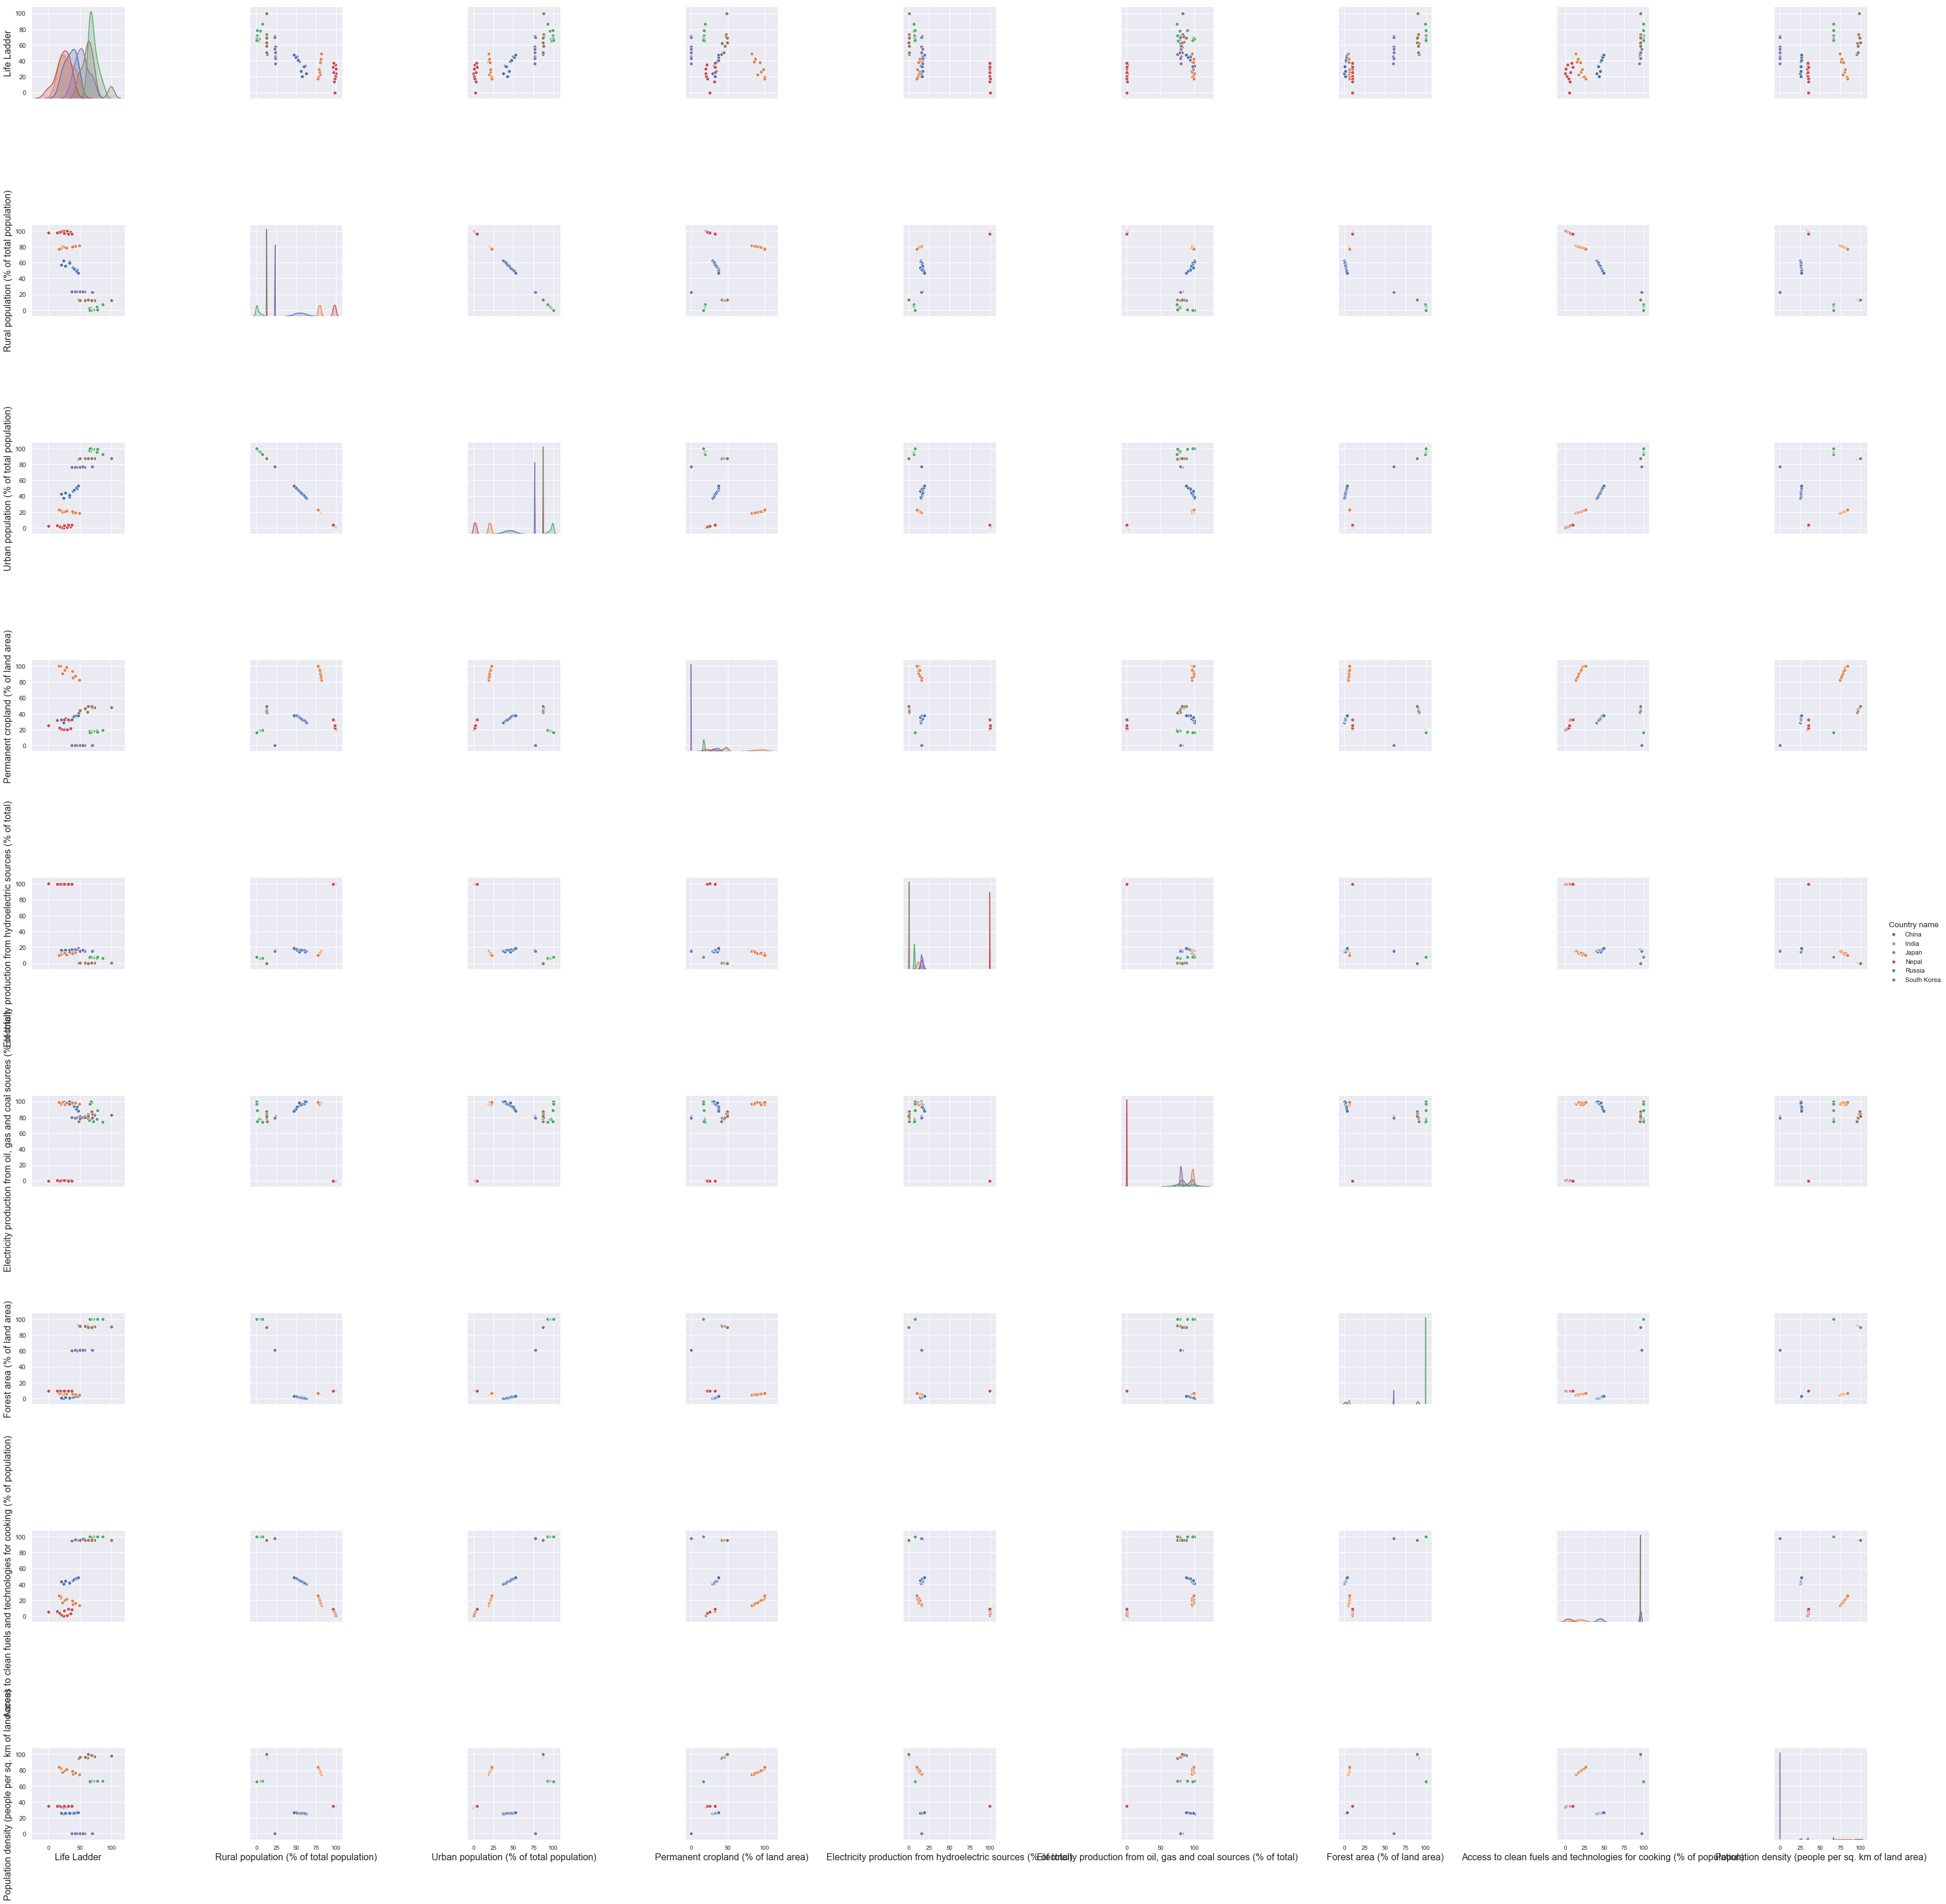

In [29]:
plotFrame = scaleDF.drop(columns='year')
plot = sns.pairplot(plotFrame, height =5, hue="Country name")


In [30]:
#This is horrible and janky I know. The function does not like spaces in the words or a majority of non-letter characters and I was pulling my hair out trying to make it work.
testDf = scaleDF.rename(columns=lambda x : x[0:4] + x[35:36])
testDf.head(10)

Coun  year       Life      Rurat      Urbat       Perm      Elece  \
0  China  2006  23.940509  62.583806  37.416194  29.110984  14.881556   
1  China  2007  33.578757  60.830622  39.169378  30.730646  14.460617   
2  China  2008  33.050660  59.065583  40.934417  31.602771  16.561335   
3  China  2009  20.557366  57.299227  42.700773  32.599483  16.253549   
4  China  2010  26.880794  55.526285  44.473715  33.845375  16.632758   
5  China  2011  39.136198  53.833691  46.166309  35.589625  14.297452   
6  China  2012  40.975754  52.181931  47.818069  37.084696  16.994137   
7  China  2013  45.635167  50.538073  49.461927  37.583053  16.414154   
8  China  2014  44.185727  48.896851  51.103149  37.632888  18.243494   
9  China  2015  47.636584  47.262214  52.737786  37.583053  18.763141   

        Elecs      Fore      Accei      Popuk  
0   99.577679  0.000000  40.479131  25.432565  
1  100.000000  0.337492  41.343542  25.574607  
2   96.917643  0.674985  42.417881  25.714682  
3   96.867459  1.012475  43.282292  25.851341  
4   95.844629  1.349968  44.319585  25.984691  
5   97.984783  1.693911  45.245740  26.117627  
6   93.984335  2.037854  46.159546  26.253460  
7   93.458734  2.381797  47.196839  26.391776  
8   90.318379  2.725736  47.888367  26.534334  
9   88.072202  3.069680  48.802173  26.678132

In [31]:
colList = list(testDf.columns.values.tolist())
del colList[0:3]
colName = list(scaleDF.columns.values.tolist())
del colName [0:3]

In [32]:
def regList(df, colList, colName, dependant):
    modList=[]
    fig = plt.figure(figsize = (20,15))
    indx=331
    
    
    for x,y in zip(colList,colName):
        fig.add_subplot(indx)
        mod = smf.ols(formula= dependant + ' ~ ' + x, data=df).fit()

        x_pred = np.linspace(df[x].min(), df[x].max(), len(df[x]))
        x_pred2 = sm.add_constant(x_pred)
        sdev, lower, upper = wls_prediction_std(mod, exog=x_pred2, alpha=0.05)

        plt.scatter(df[x], df[dependant], s=10, alpha=0.9)
        plt.fill_between(x_pred, lower, upper, color='#888888', alpha=0.2)

        plt.plot(df[x], mod.predict(df[[x]] ), 'k-', label='Linear n=1 $R^2$=%.2f' % mod.rsquared, alpha=0.9)
        plt.xlabel(y)
        plt.ylabel("Happiness score")
        modList.append(mod)
        indx+=1
        
        
    return modList

In [33]:
colList.append('year')
colName.append('year')

Rural population (% of total population)
                            OLS Regression Results                            
Dep. Variable:                   Life   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     152.8
Date:                Fri, 15 May 2020   Prob (F-statistic):           6.83e-18
Time:                        18:52:50   Log-Likelihood:                -228.73
No. Observations:                  60   AIC:                             461.5
Df Residuals:                      58   BIC:                             465.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  

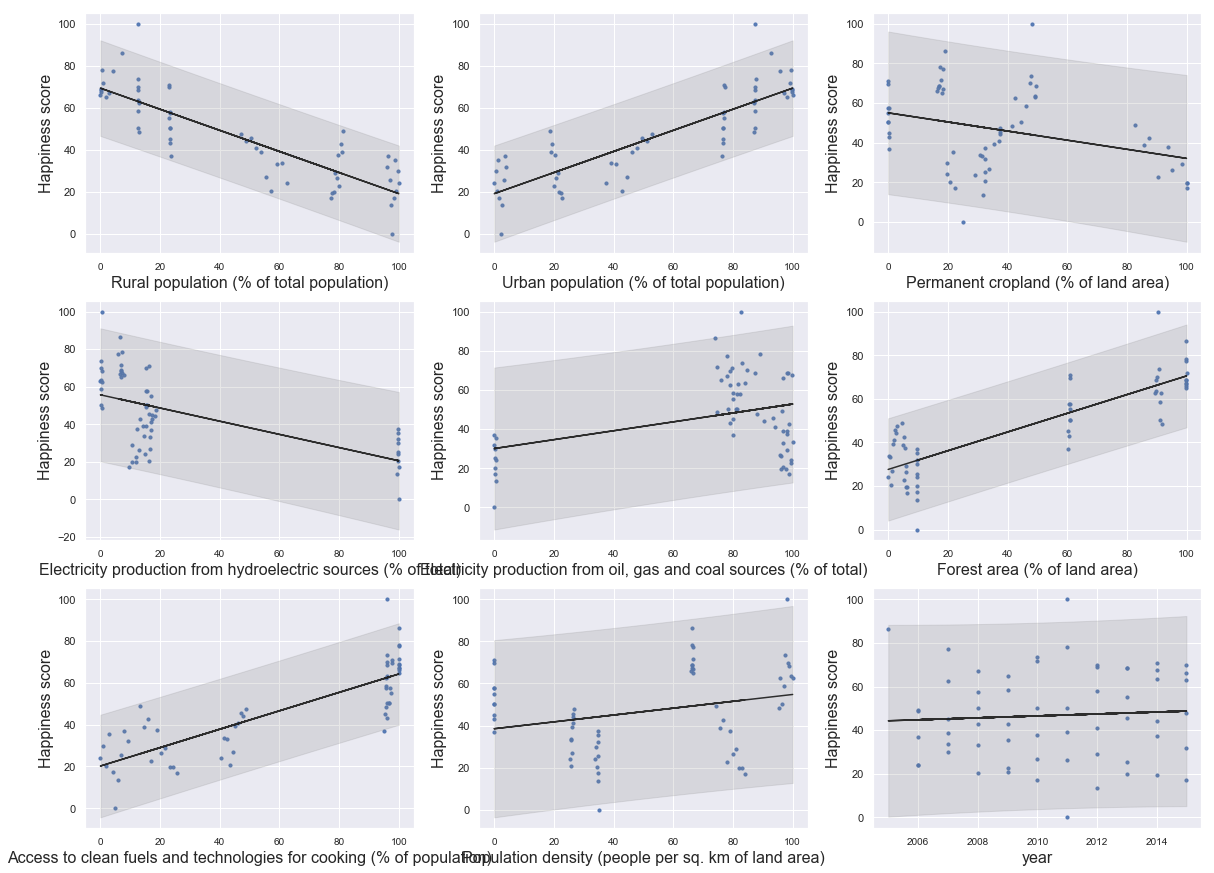

In [34]:
listOfReg = regList(testDf, colList, colName, "Life")
for x in range(0,len(colList)):
    print(colName[x])
    print(listOfReg[x].summary())
    print('==============================================================================')
    print('\n\n')

## Independent regression models

Above is a list of independent regression models, each variable is compared to or dependent variable (Life Ladder) and a model is created. Under these there is a regression plot for each variable compared to their lader score. Several of the models show good value and appear to have a strong enough correlation that predictions could be drawn from them. <br>
Specifically the plots showing 'Rural population (% of total population)', 'Urban population (% of total population)' and 'Forest area (% of land area)' all had high enough r-squared values that predictions that they make could be made with 70% confidence. With Rural population and Urban population being inverse of eachother this only leaves me with two models of merit in this set. These three indicators also show very low F-statistic values (probability), which suggests that there is validity in fitting them to the model. <br>
The coefficients for Rural and Urban population are -0.5024 and 0.5024 respectively, which suggests that as urban population increases so does happiness. This could be because life in an urban environment is easier to manage, thus resulting in happier populus. It could also be that individuals in rural settings are less inclined to respond to surveys asking how happy they are. Without further data the reasoning here is hard to gauge.<br>
The coefficient for Forest area was 0.429 which suggests that people that live in countries with more forested areas tend to be happier.<br>
Access to clean fuels and technologies for cooking (% of population) also showed some promising results, with an R-squared of 0.68, if more countries were incorporated, or if a more alike section of countries was selected I believe that this model would show even more relevence.<br>
Overall this model showed good results for the variables specified above but showed little use for the other variables included in my set.
**This was not my selected model**

In [35]:
multi_linear = smf.ols(formula='Life ~ 1 + year + Rurat + Urbat + Perm + Elece + Elecs + Fore + Accei + Popuk', data=testDf).fit()
print(multi_linear.params[0:4])
print('R-Squared: ', multi_linear.rsquared)
multi_linear.summary()

Intercept    -0.553841
year          1.466563
Rurat       -27.909558
Urbat       -27.474588
dtype: float64
R-Squared:  0.7748910985043649


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Life   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     21.94
Date:                Fri, 15 May 2020   Prob (F-statistic):           5.10e-14
Time:                        18:52:54   Log-Likelihood:                -222.70
No. Observations:                  60   AIC:                             463.4
Df Residuals:                      51   BIC:                             482.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5538      0.367     -1.510      0.137      -1.290       0.182
year           1.4666      0.937      1.565      0.124      -0.415       3.348
Rurat        -27.9096     18.183     -1.535      0.131     -64.414       8.595
Urbat        -27.4746     18.489     -1.486      0.143     -64.592       9.643
Perm          -0.3123      0.415     -0.753      0.455      -1.145       0.521
Elece         -1.2171      0.728     -1.671      0.101      -2.679       0.245
Elecs         -0.6230      0.371     -1.678      0.099      -1.368       0.122
Fore           0.5876      0.291      2.020      0.049       0.004       1.172
Accei         -1.0665      0.532     -2.004      0.050      -2.135       0.002
Popuk         -0.1625      0.225     -0.722      0.474      -0.614       0.289
==============================================================================
Omnibus:                        9.500   Durbin-Watson:                   1.475
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               11.066
Skew:                           0.641   Prob(JB):                      0.00395
Kurtosis:                       4.668   Cond. No.                     6.38e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.99e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

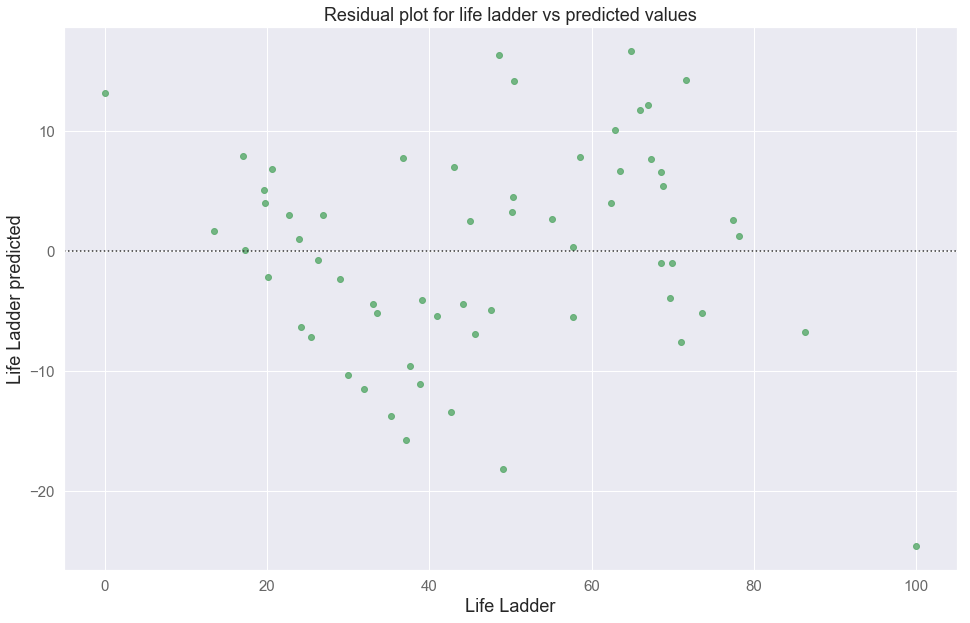

In [36]:
plt.title("Residual plot for life ladder vs predicted values", fontsize=18)
plt.ylabel("Life Ladder predicted", fontsize=18)
plt.xlabel("Life Ladder actual", fontsize=18)
plt.xticks(fontsize=15, alpha=0.7)
plt.yticks(fontsize=15, alpha=0.7)


y = multi_linear.predict()
x = scaleDF['Life Ladder']
sns.residplot(x, y, data = scaleDF, color="g")


## Multi-linear regression

The multi-linear regression model shown above reported a high R-squared value, as well as a low F-statistic value, which initially suggests that this model shows that our data fits the model. However this could be strongly affected by multicolliniarity, as many variables have been incorporated into the same model, some of which were shown to display strong colinearity in the above EDA (see cells 23 and 24). Conversely to the above linear regression models, both Urban and Rural population were shown here to have negative coefficents, suggesting that both as either Rural or Urban population grows happiness decreases (or as either population shrinks happiness increases). This seems illogical, as the independant model showed significantly different results.<br>
The residual plot above while showing some scatter/variance does not show as much variance as would be ideal.<br>
**This was not my selected model**

In [37]:
stepMod = stepwise_backwards_regression('Life', [u'year', u'Rurat', u'Urbat', u'Perm', u'Elece', u'Elecs', u'Fore', u'Accei', u'Popuk'], testDf[[u'year', u'Rurat', u'Urbat', u'Perm', u'Elece', u'Elecs', u'Fore', u'Accei', u'Popuk', 'Life']])
stepMod.summary()

Life ~ 1 +year + Rurat + Urbat + Perm + Elece + Elecs + Fore + Accei + Popuk
8 var model AIC: 463.4052828895405, adj Rsq: 0.7395798982697555
Dropped: Popuk with p-value 0.474
Life ~ 1 +Perm + Urbat + Rurat + year + Elece + Elecs + Accei + Fore
7 var model AIC: 462.01569798836357, adj Rsq: 0.7419762584852456
Dropped: Perm with p-value 0.149
Life ~ 1 +Elecs + Urbat + Elece + Rurat + year + Fore + Accei
6 var model AIC: 462.43613370722824, adj Rsq: 0.7364234066991668
Dropped: Elecs with p-value 0.504
Life ~ 1 +Elece + Urbat + Rurat + year + Fore + Accei
5 var model AIC: 460.9473170745197, adj Rsq: 0.7390910248751927
Dropped: Elece with p-value 0.863
Life ~ 1 +Urbat + Rurat + year + Accei + Fore
4 var model AIC: 458.9807350290706, adj Rsq: 0.7436921094129919
Dropped: Urbat with p-value 0.557
Life ~ 1 +Rurat + year + Accei + Fore
3 var model AIC: 458.98073502907073, adj Rsq: 0.7436921094129914
Dropped: year with p-value 0.503
Life ~ 1 +Accei + Rurat + Fore
2 var model AIC: 457.4746476095682

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Life   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     86.41
Date:                Fri, 15 May 2020   Prob (F-statistic):           5.53e-18
Time:                        18:52:55   Log-Likelihood:                -225.61
No. Observations:                  60   AIC:                             457.2
Df Residuals:                      57   BIC:                             463.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.2735      7.561      6.781      0.000      36.133      66.414
Rurat         -0.2967      0.091     -3.257      0.002      -0.479      -0.114
Fore           0.1969      0.079      2.498      0.015       0.039       0.355
==============================================================================
Omnibus:                        4.670   Durbin-Watson:                   1.395
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                3.840
Skew:                           0.442   Prob(JB):                        0.147
Kurtosis:                       3.869   Cond. No.                         356.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

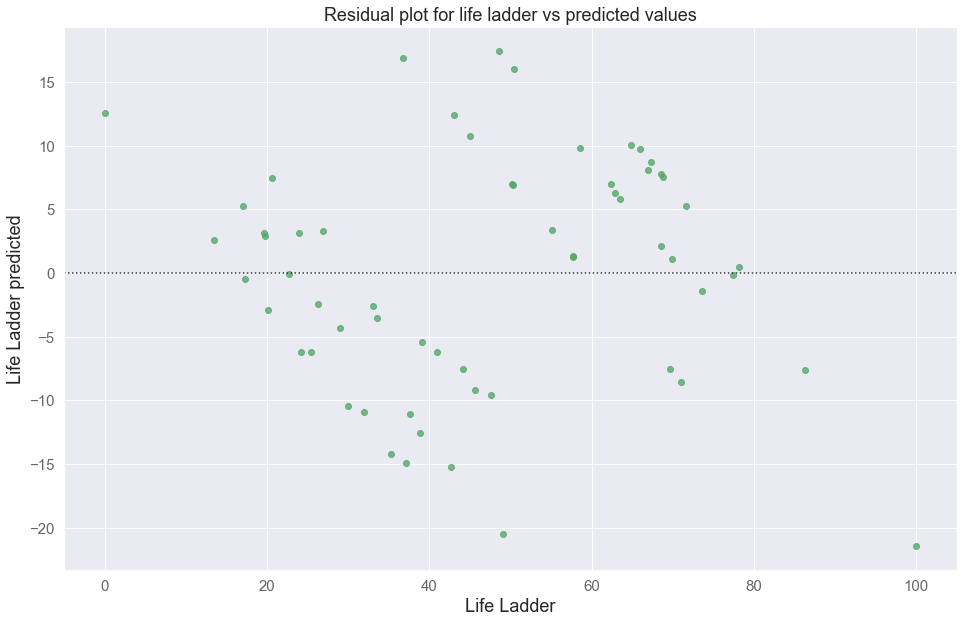

In [38]:
plt.title("Residual plot for life ladder vs predicted values", fontsize=18)
plt.ylabel("Life Ladder predicted", fontsize=18)
plt.xlabel("Life Ladder actual", fontsize=18)
plt.xticks(fontsize=15, alpha=0.7)
plt.yticks(fontsize=15, alpha=0.7)


y = stepMod.predict()
x = scaleDF['Life Ladder']
sns.residplot(x, y, data = scaleDF, color="g")

## Stepwise backwards regression

This was the model that I believed best showed and represented the data shown in the the selected sets.

This model analysed the variables that it was presented with and selected those that it thought was of best fit for predicting trends in the 'Life Ladder' variable. The final chosen sets were the Rural population (% of total population) and the Forest area (% of land area). This model was close to a desired model. However it only factored in two of the columns from my dataset, which leaves a large amount of my data unused and somewhat irrelevant. <br>
The residual plot directly above shows some amount of scatter, though there are two fairly distinct bands that appear. This is likely due to two groups of countries showing more similarity between eachother than with the other group of countries (i.e China, Korea and Japan may have had more in common with eachother than with Nepal, Russia and India (this was an arbitary comparison for explanations purposes)).<br>
The coefficient for Rural population was -0.2967, which indicates that as rural population decreases the ladder score increases (again indicating that countries with higher urban populations typically have happier populations). Specifically this shows that for every 1% (scaled) higher the rural population of a country is the Ladder score of that country dropped by 0.2967 (on average in the countries included in this sample). The coefficient for Forest area however, 0.1969 indicates that people in countries with more forest area tend to be happier. Meaning that although people are happier living in Urban settings, they prefer the surrounding country side to be forested. <br>
The relatively high R-squared value indicates that this model explains a majority of the variance around the mean around our dependent variable. The low standard error values for both of my in independant variables supports this. These factors together mean that any predicted values generated from this model could be shown to be of worth.<br>

This model was the best model produced in my investigations with the data that was used, and although the residuals plot did not display as much scatter as would have been ideal, I still believe that it would be a good model for predicting happiness in a country based on the environmental factors specifed at the beginning of the report.<br>

**This is my selected model**

